## **Módulo 1 Técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos**
###*Adrián Emmanuel Faz Mercado A01570770*

**Instrucciones**: La empresa automovilística china aspira a entrar en el mercado estadounidense. Desea establecer allí una unidad de fabricación y producir automóviles localmente para competir con sus contrapartes estadounidenses y europeas. Contrataron una empresa de consultoría de automóviles para identificar los principales factores de los que depende el precio de los automóviles, específicamente, en el mercado estadounidense, ya que pueden ser muy diferentes del mercado chino.

Esencialmente, la empresa quiere saber:

- **Qué variables son significativas para predecir el precio de un automóvil**

- **Qué tan bien describen esas variables el precio de un automóvil**

## **1. Exploración y preparación de la base de datos (Portafolio de Análisis)**

Para comenzar a explorar y a preparar nuestra base de datos, se comenzará leyendo el archivo de loos datos y almacenandolo en una variable como un dataframe.

In [80]:
mydata <- read.csv("precios_autos.csv")
head(mydata)

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,⋯,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,⋯,dohc,four,130,2.68,9.0,111,5000,21,27,13495
2,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,⋯,dohc,four,130,2.68,9.0,111,5000,21,27,16500
3,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,⋯,ohcv,six,152,3.47,9.0,154,5000,19,26,16500
4,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,⋯,ohc,four,109,3.40,10.0,102,5500,24,30,13950
5,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,⋯,ohc,five,136,3.40,8.0,115,5500,18,22,17450
6,2,audi fox,gas,sedan,fwd,front,99.8,177.3,66.3,53.1,⋯,ohc,five,136,3.40,8.5,110,5500,19,25,15250


Se crea una lista para nuestras variables categoricas y una lista para nuestras variables numéricas.

In [81]:
variables_cuantitativas <- c("wheelbase", "carlength", "carwidth", "carheight", "curbweight",
                             "enginesize", "stroke", "compressionratio", "horsepower",
                             "peakrpm", "citympg", "highwaympg", "price")

variables_categoricas <- c("Symboling", "CarName", "fueltype", "carbody", "drivewheel",
                          "enginelocation", "enginetype", "cylindernumber")

Se obtienen las medidas estadísticas principales de todas las variables cuantitativas

In [82]:
for (variable in variables_cuantitativas) {
  cat("Medidas variable: ", variable, ":\n")
  print(summary(mydata[[variable]]))

  cat("Desviación estándar: ")
  print(sd(mydata[[variable]]))
  cat("\n")
}

Medidas variable:  wheelbase :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  86.60   94.50   97.00   98.76  102.40  120.90 
Desviación estándar: [1] 6.021776

Medidas variable:  carlength :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  141.1   166.3   173.2   174.0   183.1   208.1 
Desviación estándar: [1] 12.33729

Medidas variable:  carwidth :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  60.30   64.10   65.50   65.91   66.90   72.30 
Desviación estándar: [1] 2.145204

Medidas variable:  carheight :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  47.80   52.00   54.10   53.72   55.50   59.80 
Desviación estándar: [1] 2.443522

Medidas variable:  curbweight :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1488    2145    2414    2556    2935    4066 
Desviación estándar: [1] 520.6802

Medidas variable:  enginesize :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   61.0    97.0   120.0   126.9   141.0   326.0 
Desviación estándar: [1] 41.64269

Medidas variabl

Se calculan las frecuencias de las diferentes variables categóricas presentes de manera numérica.

In [83]:
for (variable in variables_categoricas) {
  cat("Frecuencias de la variable", variable, ":\n")
  print(table(mydata[[variable]]))
  cat("\n")
}

Frecuencias de la variable Symboling :
< table of extent 0 >

Frecuencias de la variable CarName :

             alfa-romero giulia        alfa-romero Quadrifoglio 
                              1                               1 
            alfa-romero stelvio                     audi 100 ls 
                              1                               1 
                     audi 100ls                       audi 4000 
                              2                               1 
                      audi 5000             audi 5000s (diesel) 
                              1                               1 
                       audi fox                        bmw 320i 
                              1                               2 
                         bmw x1                          bmw x3 
                              1                               2 
                         bmw x4                          bmw x5 
                              1                        

Antes de comenzar con el análisis y limpieza, es necesario saber si existen registros sin datos o con campos vacíos., para manipularlos y manejarlos adecuadamente

In [84]:
colSums(is.na(mydata))

symboling          CarName         fueltype          carbody 
               0                0                0                0 
      drivewheel   enginelocation        wheelbase        carlength 
               0                0                0                0 
        carwidth        carheight       curbweight       enginetype 
               0                0                0                0 
  cylindernumber       enginesize           stroke compressionratio 
               0                0                0                0 
      horsepower          peakrpm          citympg       highwaympg 
               0                0                0                0 
           price 
               0

En este caso, afortunadamente no hay campos vacíos en ninguno de los registros, por lo que se podemos continuar con el análisis sin necesidad de hacer limpieza en este sentido, pues nuestros datos están listos.

Para analizar la distribución de los datos de las variables cuantitativas, a continuación se realizarán gráficas para mostrar su distribución y para poder definir si se tratan de distribuciones simétricas o no. Además, se realizará un análisis de la relación entre la variable y la variable dependiente, para analizar si podría ser una variable determinante para predecir el precio del auto.

Definimos una variable de precio, que contiene los valores de los precios en el set de datos. Este se usará para saber si hay una relación en las diferentes variables cuantitativas y cualitativas con el mismo.

In [85]:
data_price = mydata[["price"]]
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Variables cuantitativas

### Wheel Base

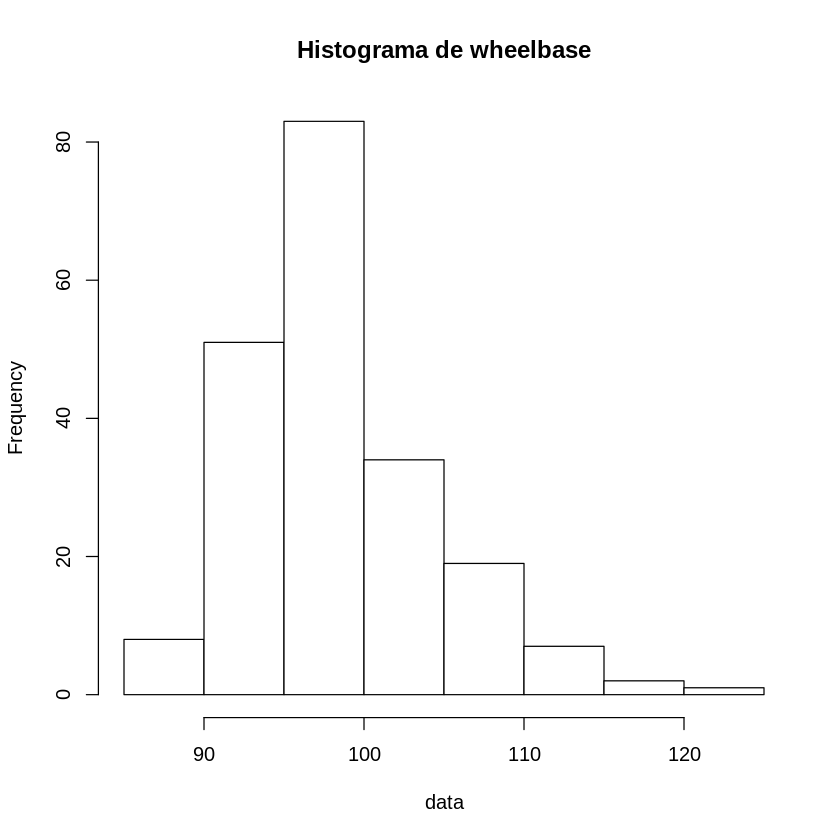

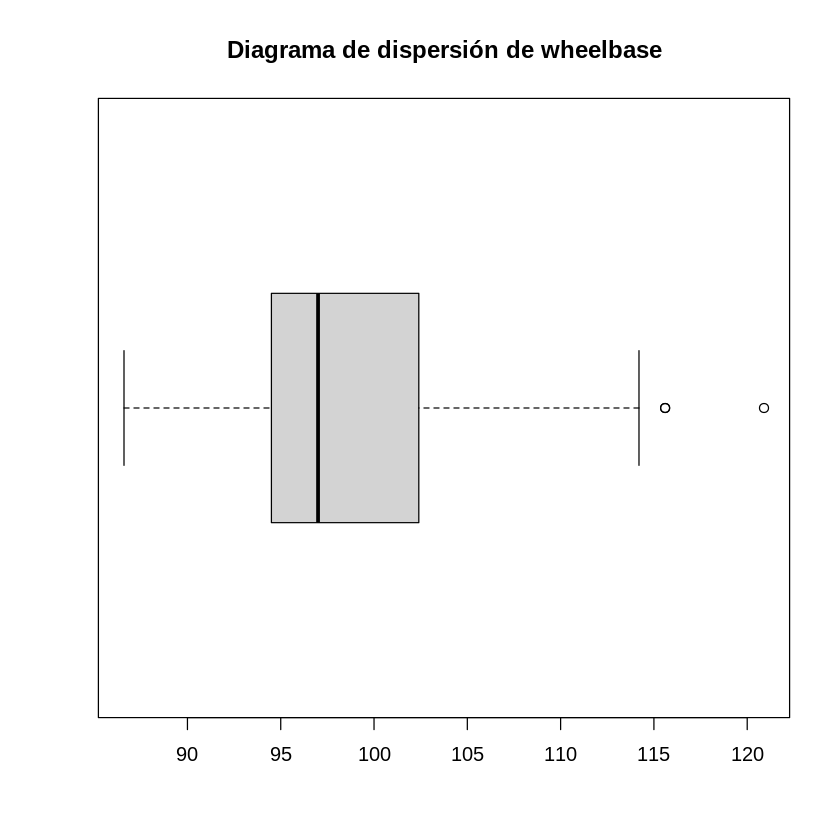

Coeficiente de correlación entre wheelbase y precio: 0.5778156 
Sesgo:  1.034895 


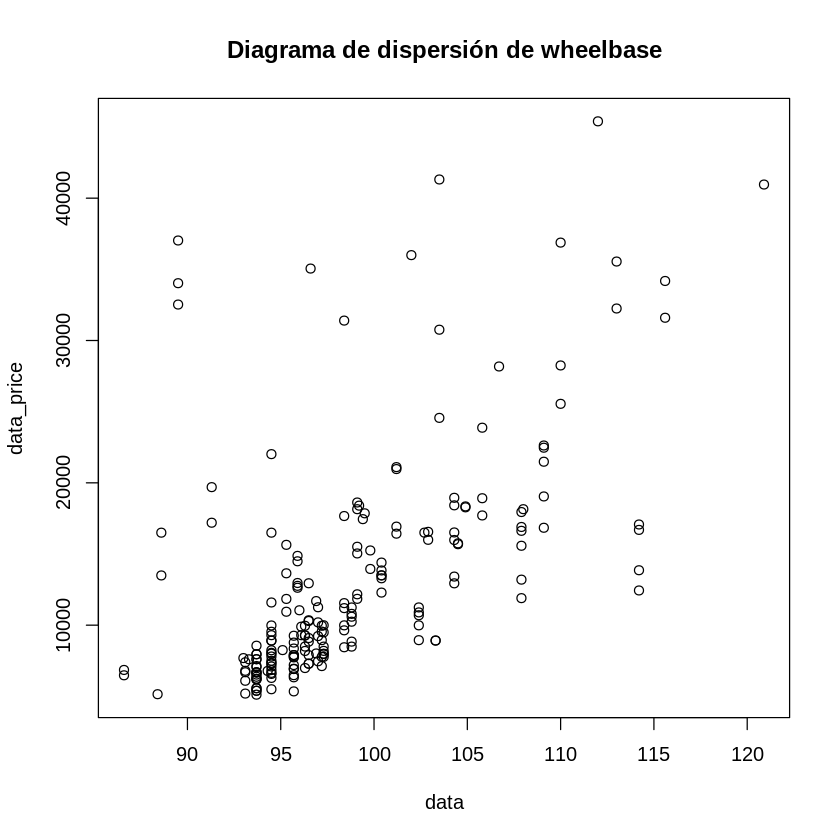

In [86]:
variable = "wheelbase"
data = mydata[[variable]]

# Histograma
hist(data,col=0,main=paste("Histograma de",  variable))

# Diagrama de caja y bigotes
boxplot(data,horizontal=TRUE, main=paste("Diagrama de dispersión de", variable))

# Diagrama de dispersión
plot(data,data_price, main=paste("Diagrama de dispersión de", variable))

# Coeficiente de correlación
coef_corr <- cor(mydata[[variable]], mydata[["price"]], use = "complete.obs")
    cat("Coeficiente de correlación entre", variable, "y precio:", coef_corr, "\n")

# Coeficiente de sesgo
sesgo = skewness(data)
cat("Sesgo: ", sesgo, "\n")

Distribución: **Asimétrica**

Se puede observar que el histograma no se encuentra balanceado y que hay una cola más larga a la derecha, por lo que hay una asimetría positiva.

Correlación con precio: 0.57 (Si se observa una cierta relación pero podría mejorar)

###Car Length

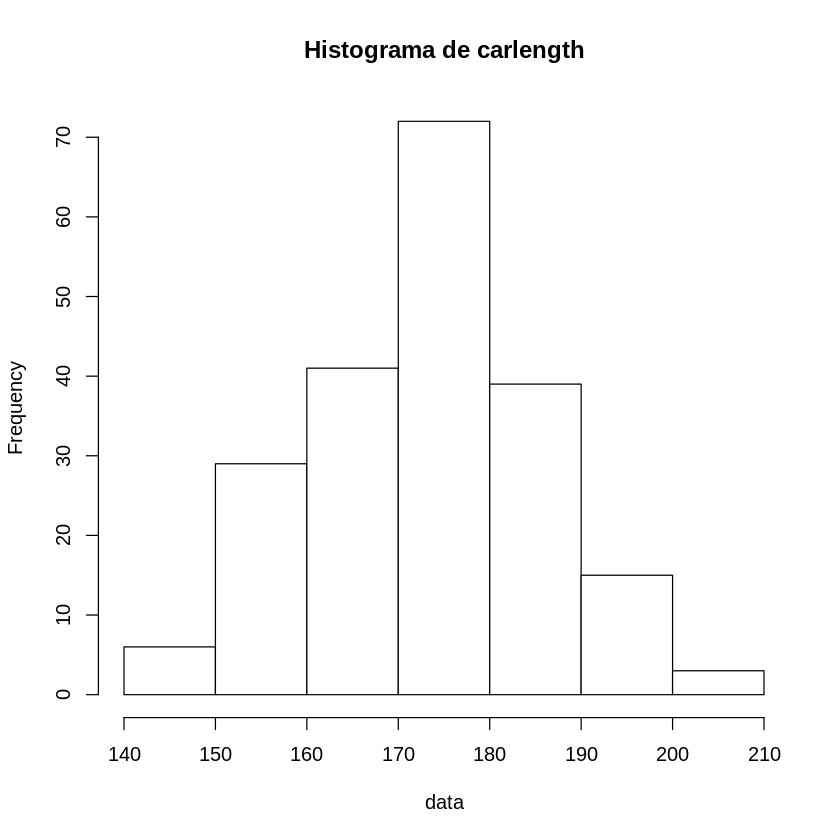

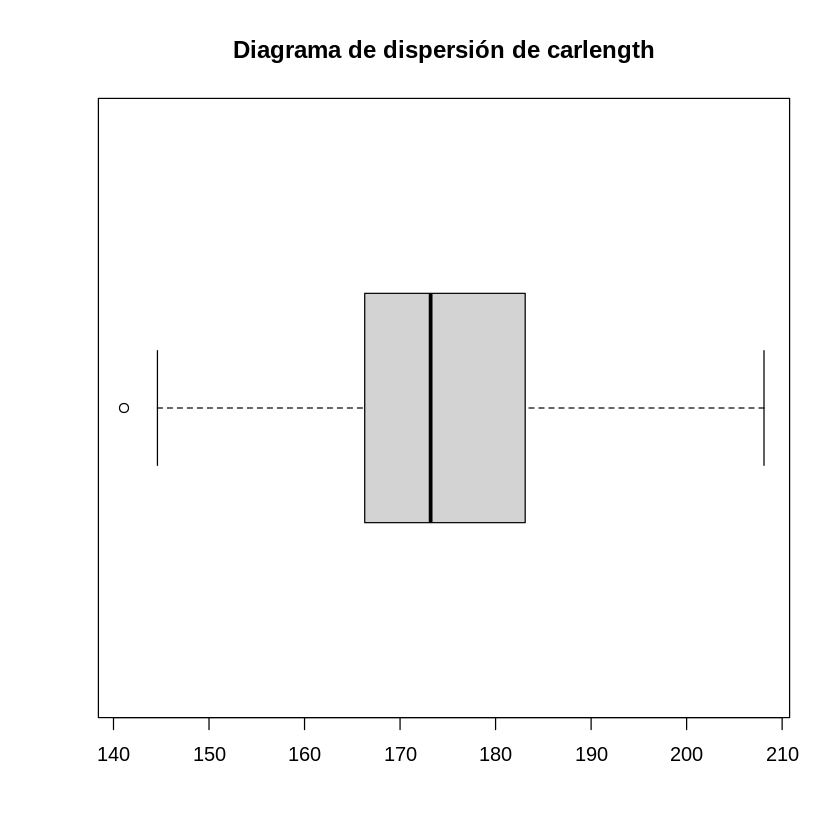

Coeficiente de correlación entre carlength y precio: 0.68292 
Sesgo:  0.1536789 


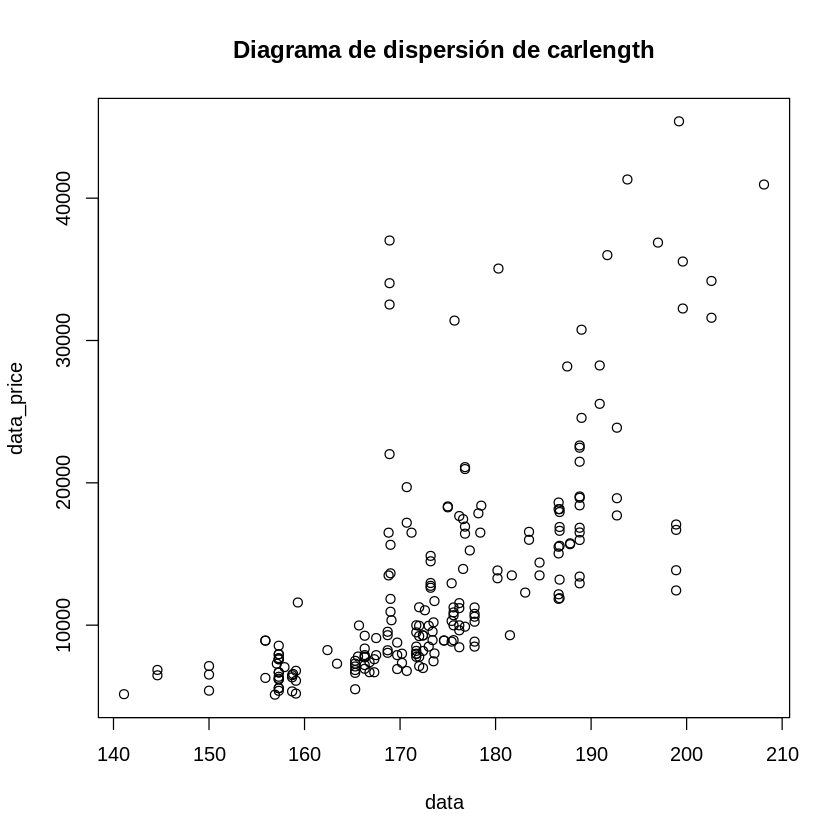

In [87]:
variable = "carlength"
data = mydata[[variable]]

# Histograma
hist(data,col=0,main=paste("Histograma de",  variable))

# Diagrama de caja y bigotes
boxplot(data,horizontal=TRUE, main=paste("Diagrama de dispersión de", variable))

# Diagrama de dispersión
plot(data,data_price, main=paste("Diagrama de dispersión de", variable))

# Coeficiente de correlación
coef_corr <- cor(mydata[[variable]], mydata[["price"]], use = "complete.obs")
    cat("Coeficiente de correlación entre", variable, "y precio:", coef_corr, "\n")

# Coeficiente de sesgo
sesgo = skewness(data)
cat("Sesgo: ", sesgo, "\n")

Distribución: **Asimétrica**

Se puede observar que el histograma no se encuentra balanceado y que hay una cola más larga a la derecha, por lo que hay una asimetría positiva.

Correlación con precio: 0.57 (Si se observa una cierta relación pero podría mejorar)

###Car Width

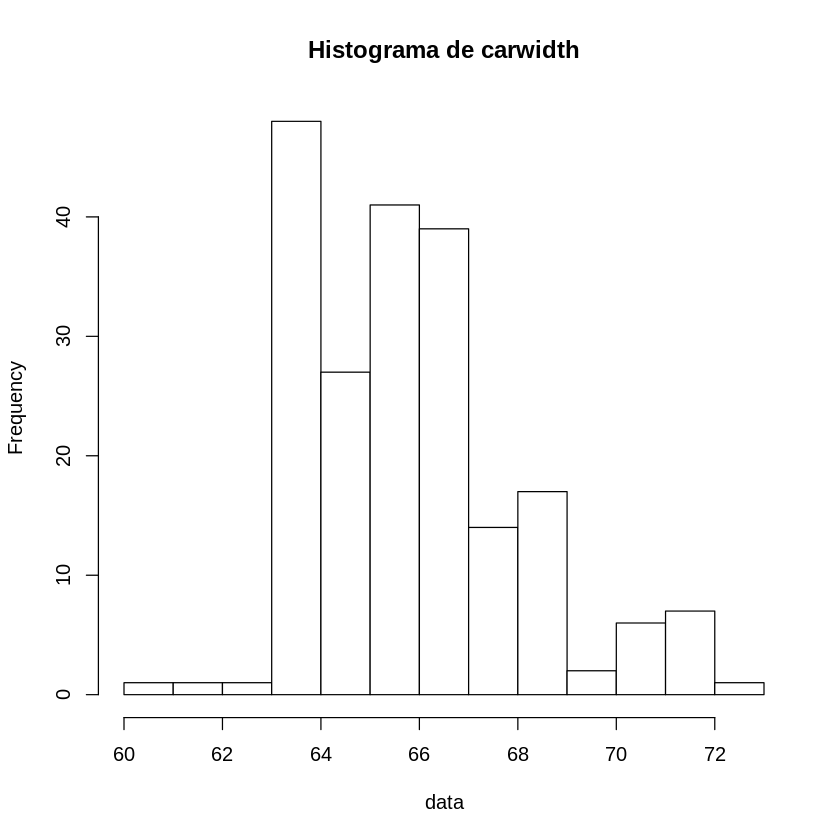

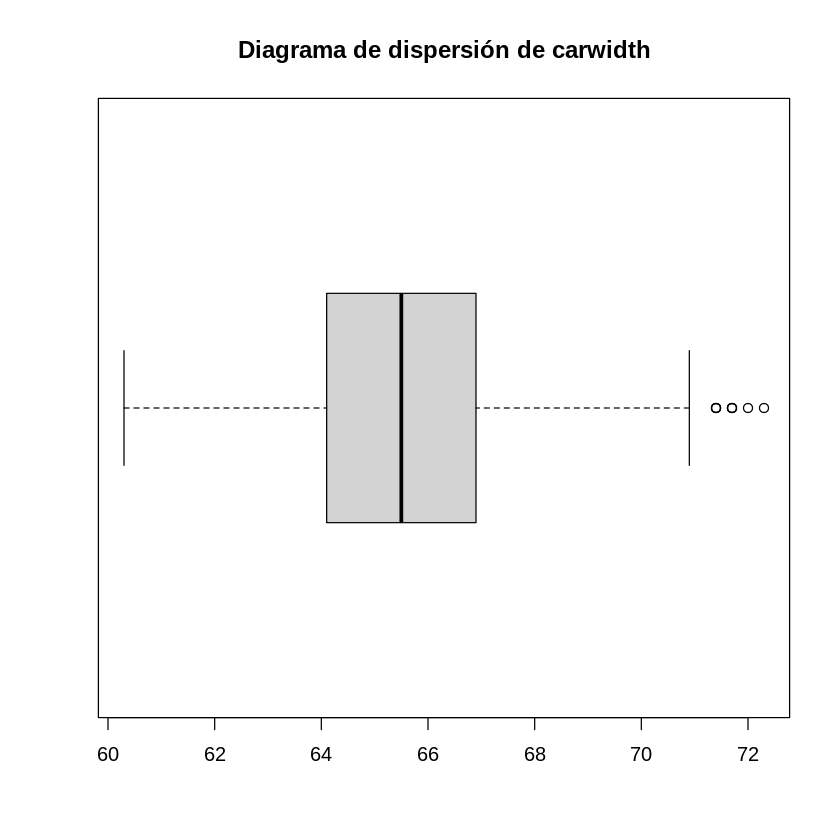

Coeficiente de correlación entre carwidth y precio: 0.7593253 
Sesgo:  0.8908172 


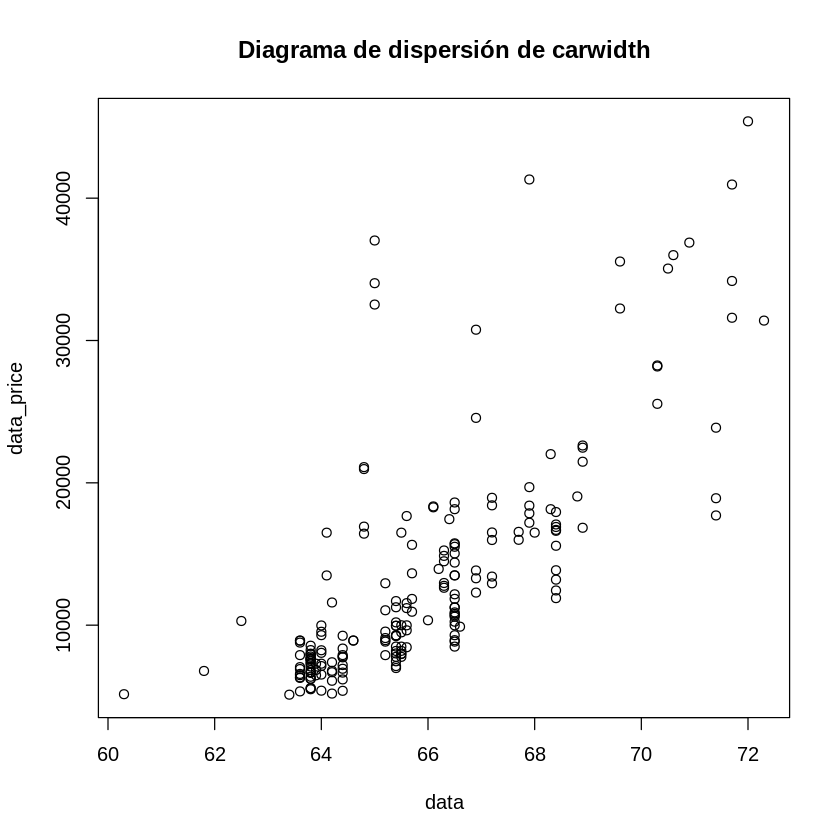

In [88]:
variable = "carwidth"
data = mydata[[variable]]

# Histograma
hist(data,col=0,main=paste("Histograma de",  variable))

# Diagrama de caja y bigotes
boxplot(data,horizontal=TRUE, main=paste("Diagrama de dispersión de", variable))

# Diagrama de dispersión
plot(data,data_price, main=paste("Diagrama de dispersión de", variable))

# Coeficiente de correlación
coef_corr <- cor(mydata[[variable]], mydata[["price"]], use = "complete.obs")
    cat("Coeficiente de correlación entre", variable, "y precio:", coef_corr, "\n")

# Coeficiente de sesgo
sesgo = skewness(data)
cat("Sesgo: ", sesgo, "\n")

Distribución: **Asimétrica**

Si bien esta dispersión se ve más parecida a una distribución normal, en realidad no lo es completamente, pues  igual se ve que existe una cola más grande del lado derecho, y aunque bajó el valor de sesgo a 0.89, aún tiene asimetría positiva.

Correlación con precio: 0.75 (En este caso hay una mayor correlación entre las variables de carwidth y el precio del auto.

###Car Height

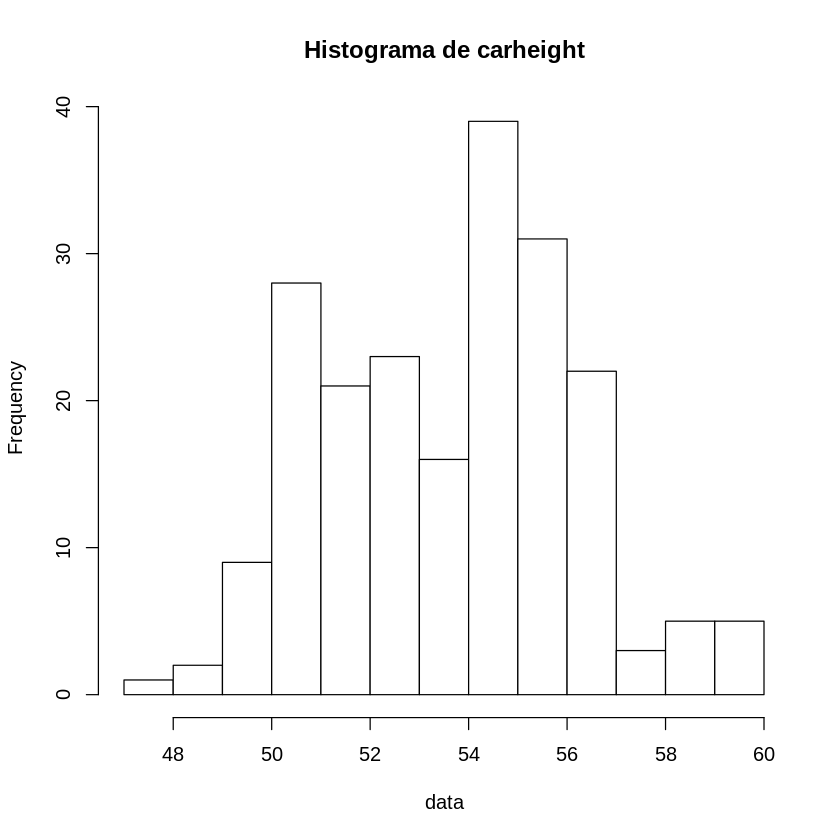

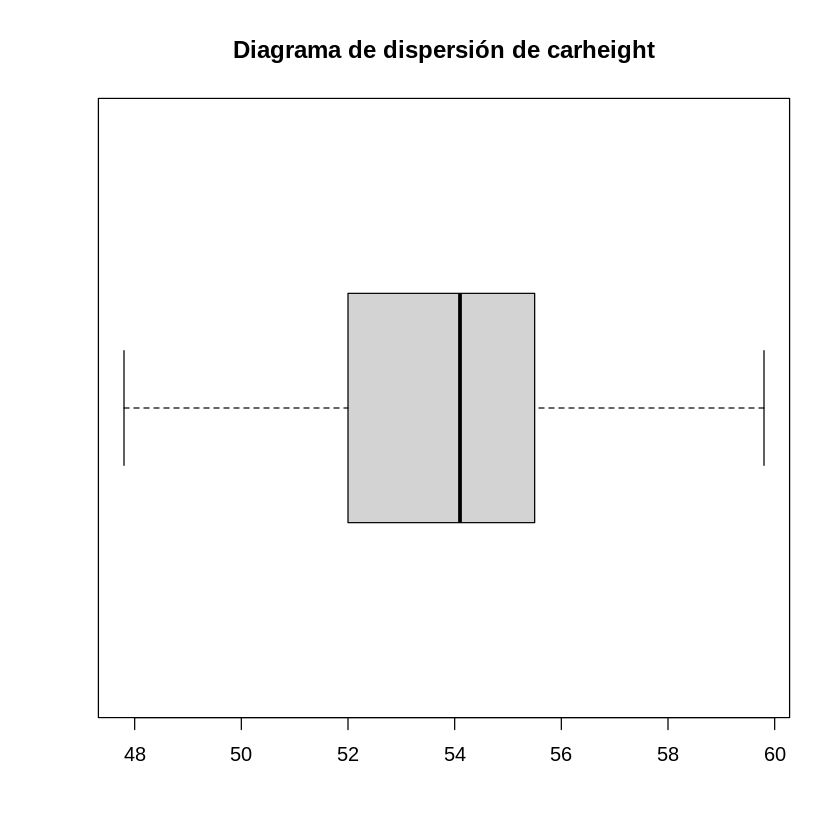

Coeficiente de correlación entre carheight y precio: 0.1193362 
Sesgo:  0.06220199 


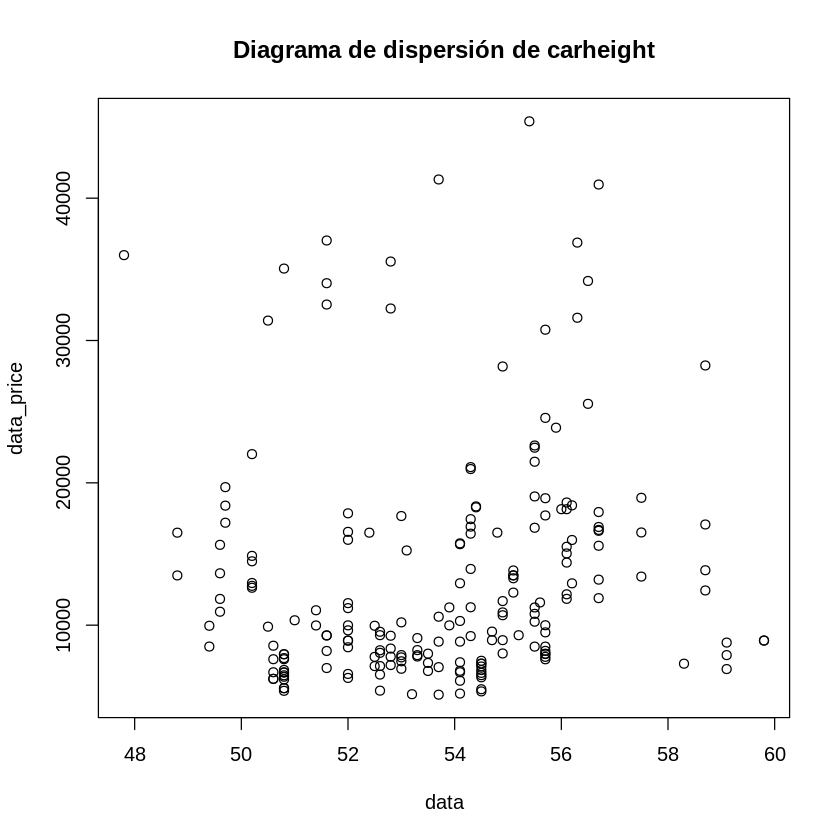

In [89]:
variable = "carheight"
data = mydata[[variable]]

# Histograma
hist(data,col=0,main=paste("Histograma de",  variable))

# Diagrama de caja y bigotes
boxplot(data,horizontal=TRUE, main=paste("Diagrama de dispersión de", variable))

# Diagrama de dispersión
plot(data,data_price, main=paste("Diagrama de dispersión de", variable))

# Coeficiente de correlación
coef_corr <- cor(mydata[[variable]], mydata[["price"]], use = "complete.obs")
    cat("Coeficiente de correlación entre", variable, "y precio:", coef_corr, "\n")

# Coeficiente de sesgo
sesgo = skewness(data)
cat("Sesgo: ", sesgo, "\n")

Distribución: **Simétrica**

En este caso, no se obserfva un espejo en el histograma, pero se puede observar que sí se encuentran distribuídos de una mejor manera. El sesgo nos indica que sí existe simetría en el conjunto de datos, pues el valor es muy cercano a 0.

Correlación con precio: 0.11 (Si bien tuvimos un gran resultado con la distribución de los datos, se puede observar en la gráfica y en el coeficiente que no hay una relación mayor entre el precio y la altura del carro, varía mucho y no sigue una tendencia.

###Curb Weight

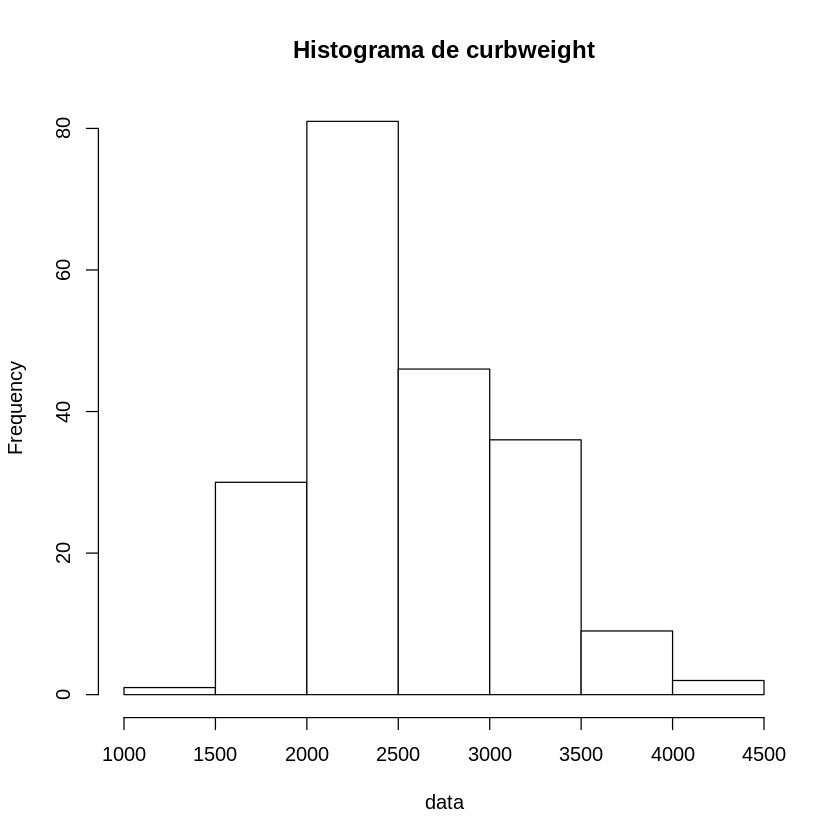

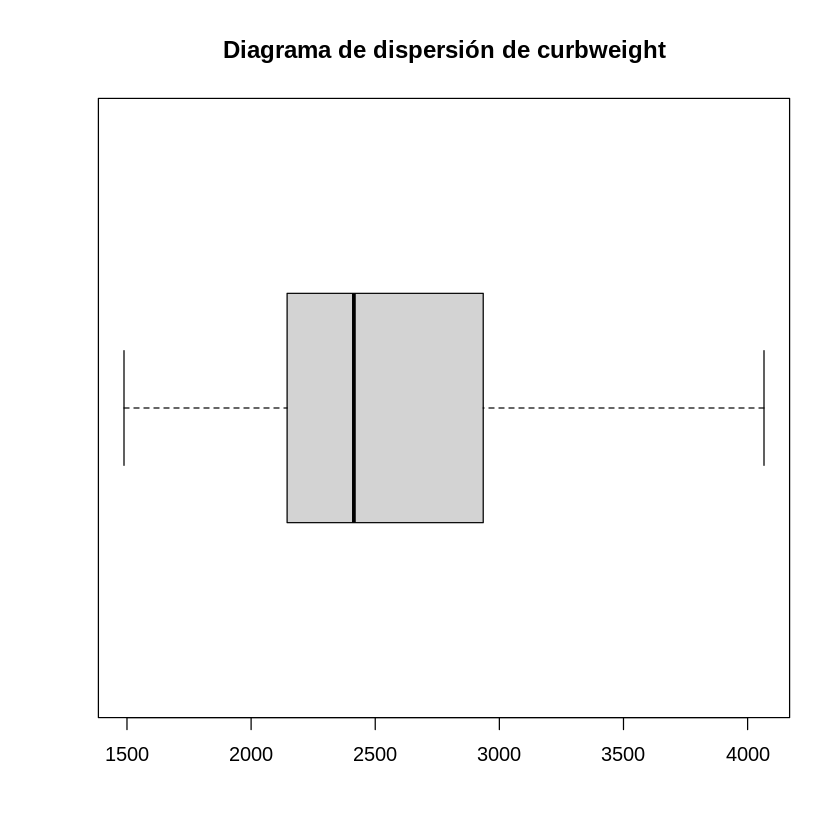

Coeficiente de correlación entre curbweight y precio: 0.8353049 
Sesgo:  0.6714589 


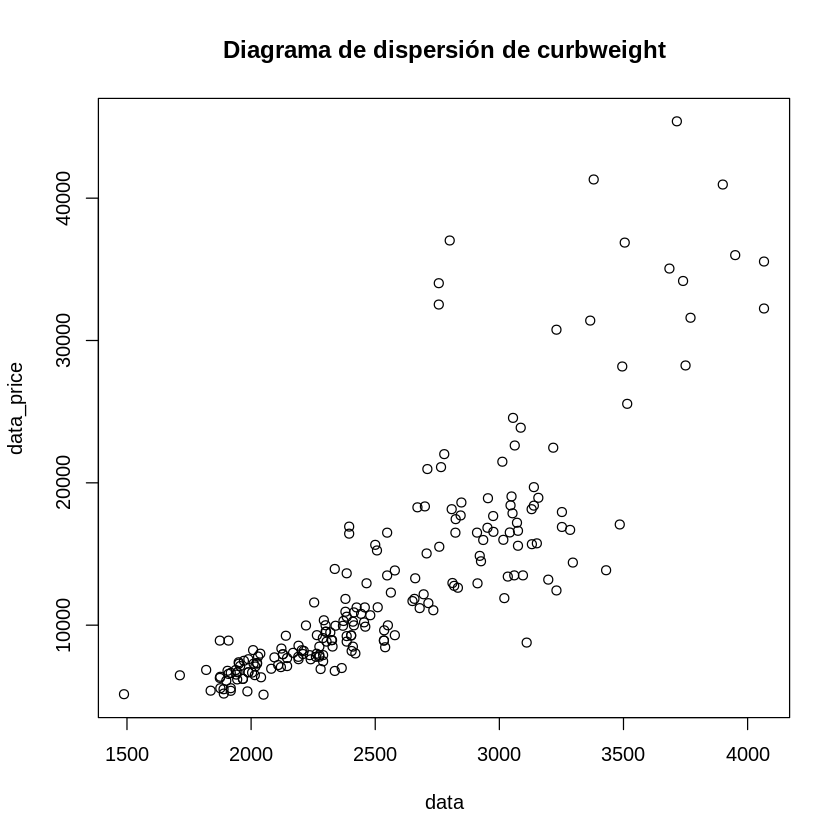

In [90]:
variable = "curbweight"
data = mydata[[variable]]

# Histograma
hist(data,col=0,main=paste("Histograma de",  variable))

# Diagrama de caja y bigotes
boxplot(data,horizontal=TRUE, main=paste("Diagrama de dispersión de", variable))

# Diagrama de dispersión
plot(data,data_price, main=paste("Diagrama de dispersión de", variable))

# Coeficiente de correlación
coef_corr <- cor(mydata[[variable]], mydata[["price"]], use = "complete.obs")
    cat("Coeficiente de correlación entre", variable, "y precio:", coef_corr, "\n")


# Coeficiente de sesgo
sesgo = skewness(data)
cat("Sesgo: ", sesgo, "\n")

Distribución: **Asimétrica**

La gráfica nos muestra directamente que existe un sesgo a la derecha, pues la cola es mucho más larga. No es asimétrica.
Correlación con precio: 0.67 (Es buen resultado de relación, puede que si tengan una relación importante pero habría que investigar y revisar más.)

###Engine Size

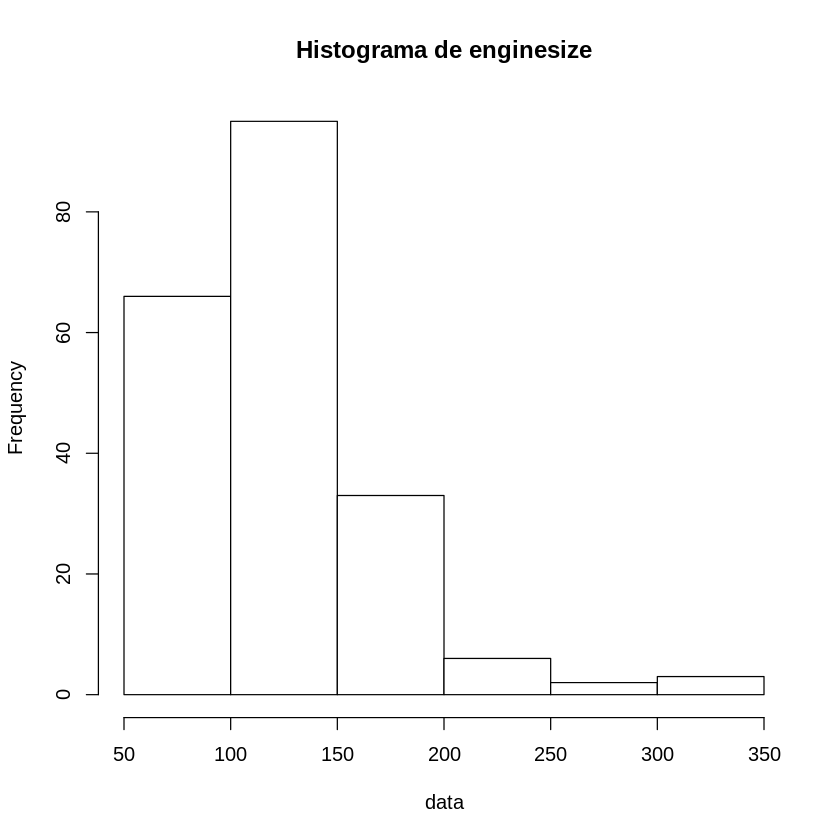

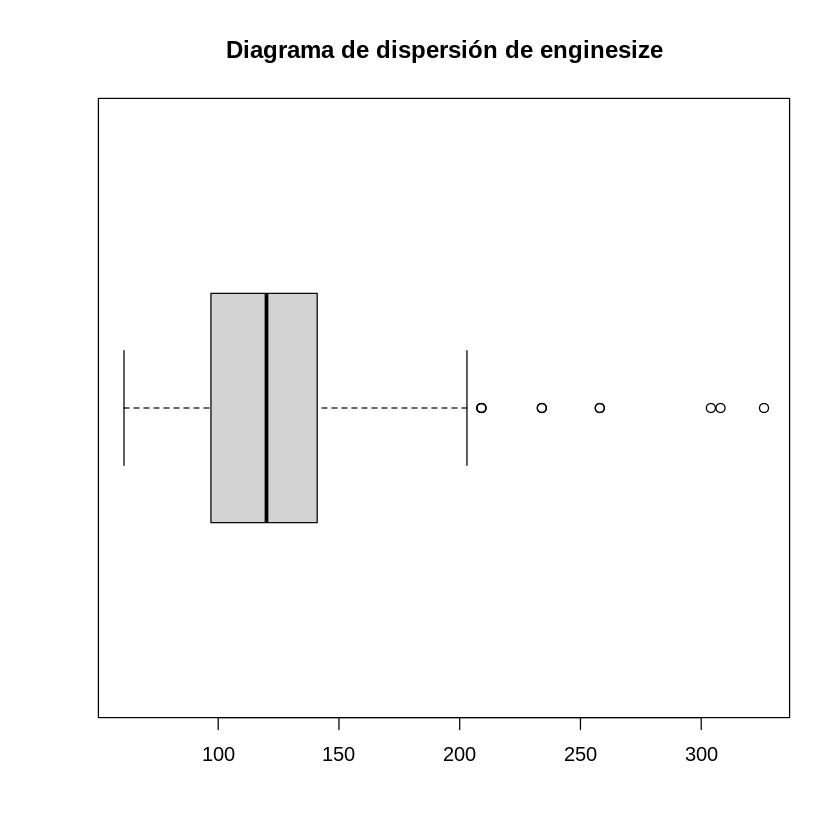

Coeficiente de correlación entre enginesize y precio: 0.8741448 
Sesgo:  1.919245 


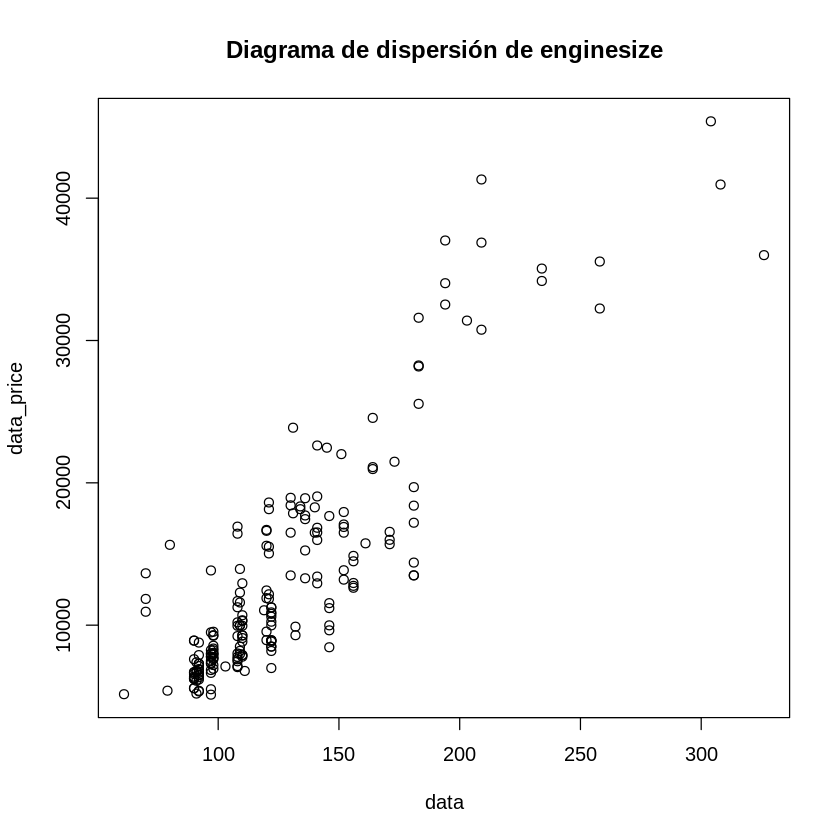

In [91]:
variable = "enginesize"
data = mydata[[variable]]

# Histograma
hist(data,col=0,main=paste("Histograma de",  variable))

# Diagrama de caja y bigotes
boxplot(data,horizontal=TRUE, main=paste("Diagrama de dispersión de", variable))

# Diagrama de dispersión
plot(data,data_price, main=paste("Diagrama de dispersión de", variable))

# Coeficiente de correlación
coef_corr <- cor(mydata[[variable]], mydata[["price"]], use = "complete.obs")
    cat("Coeficiente de correlación entre", variable, "y precio:", coef_corr, "\n")

# Coeficiente de sesgo
sesgo = skewness(data)
cat("Sesgo: ", sesgo, "\n")

Distribución: **Asimétrica**

La gráfica nos muestra directamente que existe un sesgo a la derecha, pues la cola es más larga de la derecha. Sin embargo, en este caso sería bueno intentar quitar los valores de outliers, para ver el efecto en la dispersión de datos.

Correlación con precio: 0.87 (Es un increíble valor de correlación, al parecer es muy probable que mientras mayor sea el tamaño del motor, mayor el precio también.

###Stroke

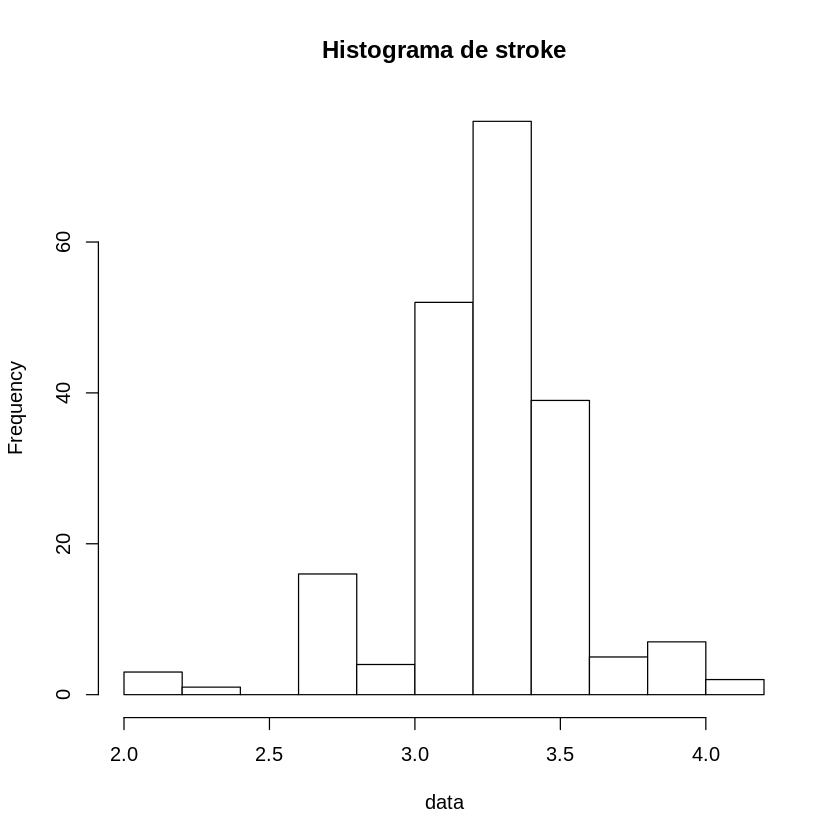

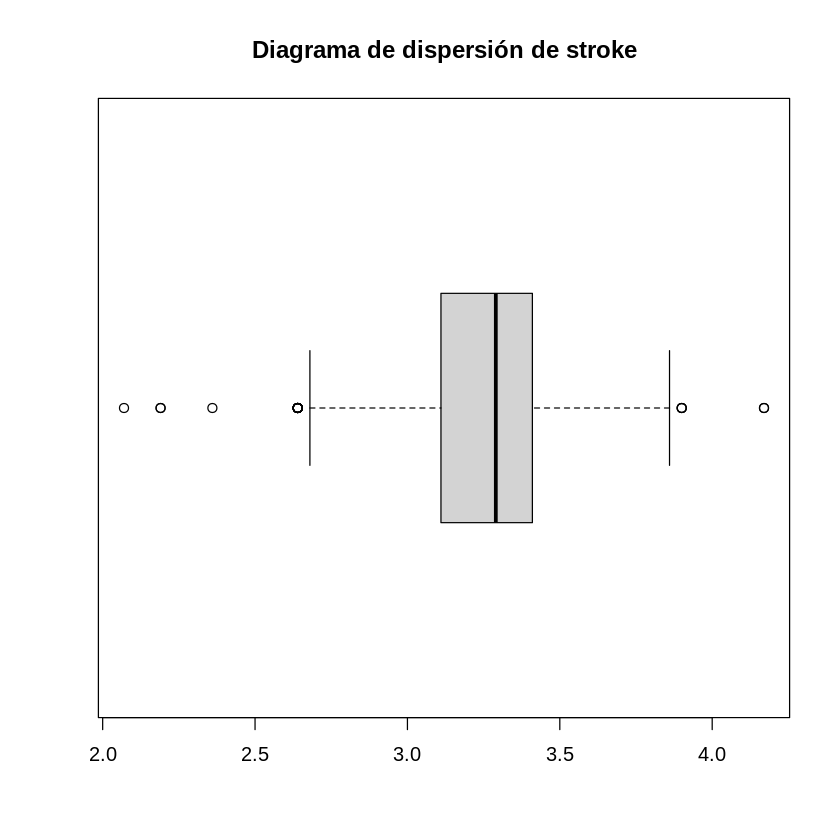

Coeficiente de correlación entre stroke y precio: 0.07944308 
Sesgo:  -0.6796442 


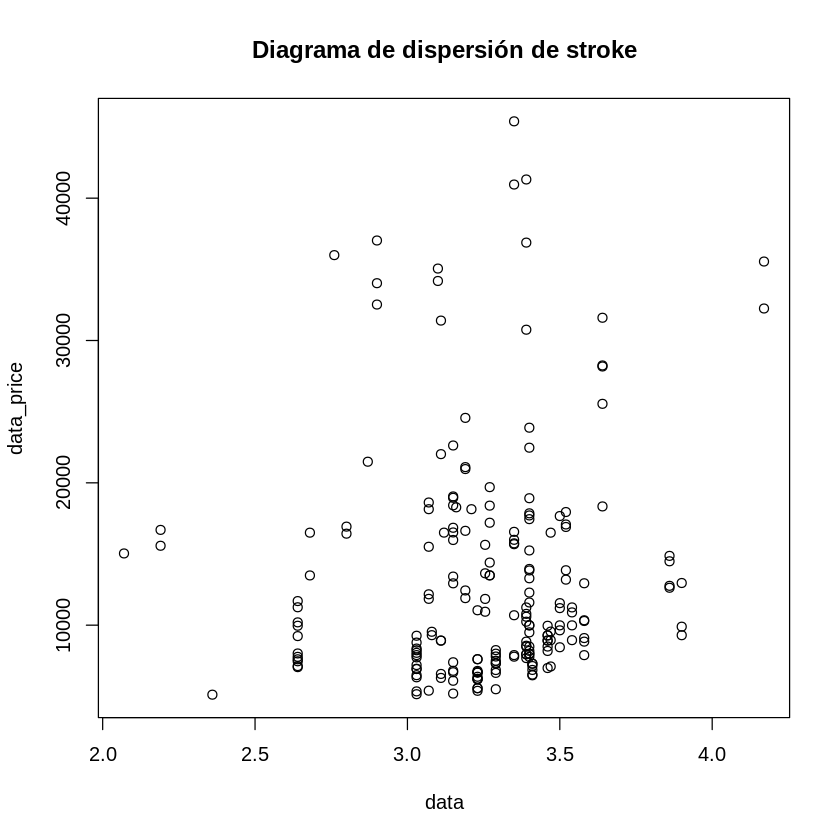

In [92]:
variable = "stroke"
data = mydata[[variable]]

# Histograma
hist(data,col=0,main=paste("Histograma de",  variable))

# Diagrama de caja y bigotes
boxplot(data,horizontal=TRUE, main=paste("Diagrama de dispersión de", variable))

# Diagrama de dispersión
plot(data,data_price, main=paste("Diagrama de dispersión de", variable))

# Coeficiente de correlación
coef_corr <- cor(mydata[[variable]], mydata[["price"]], use = "complete.obs")
    cat("Coeficiente de correlación entre", variable, "y precio:", coef_corr, "\n")

# Coeficiente de sesgo
sesgo = skewness(data)
cat("Sesgo: ", sesgo, "\n")

Distribución: **Asimétrica**

La gráfica del histograma nos indica que existe asimetría hacia la izquierda, pues está más grande esa cola, además de que el sesgo es negativo.

Correlación con precio: 0.07 No existe una correlación entre las variables que tenga una evidencia suficiente.

###Compression Ratio

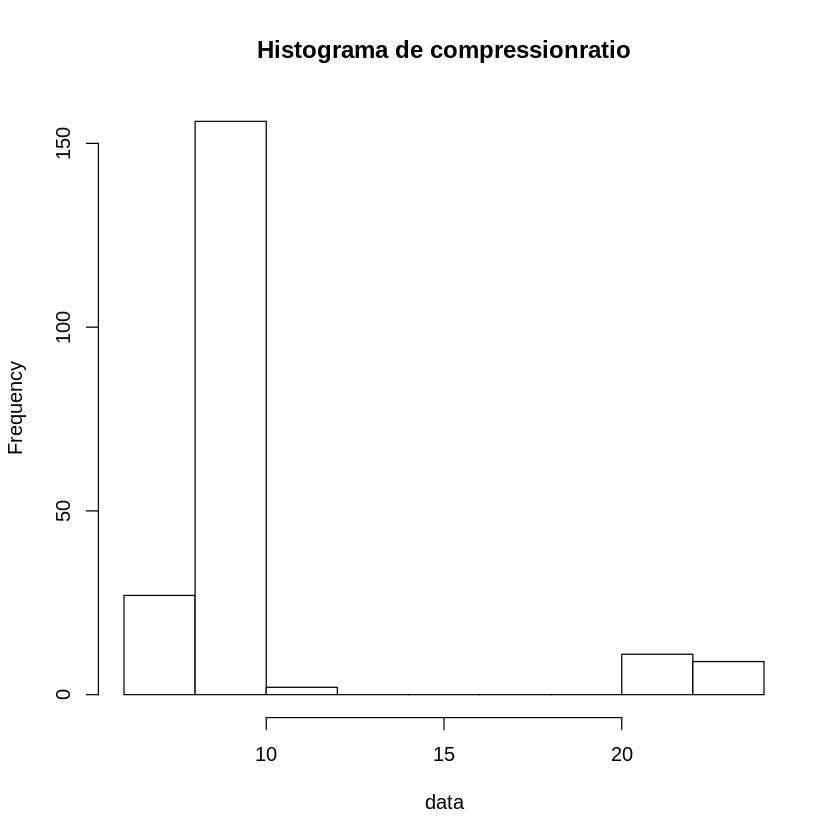

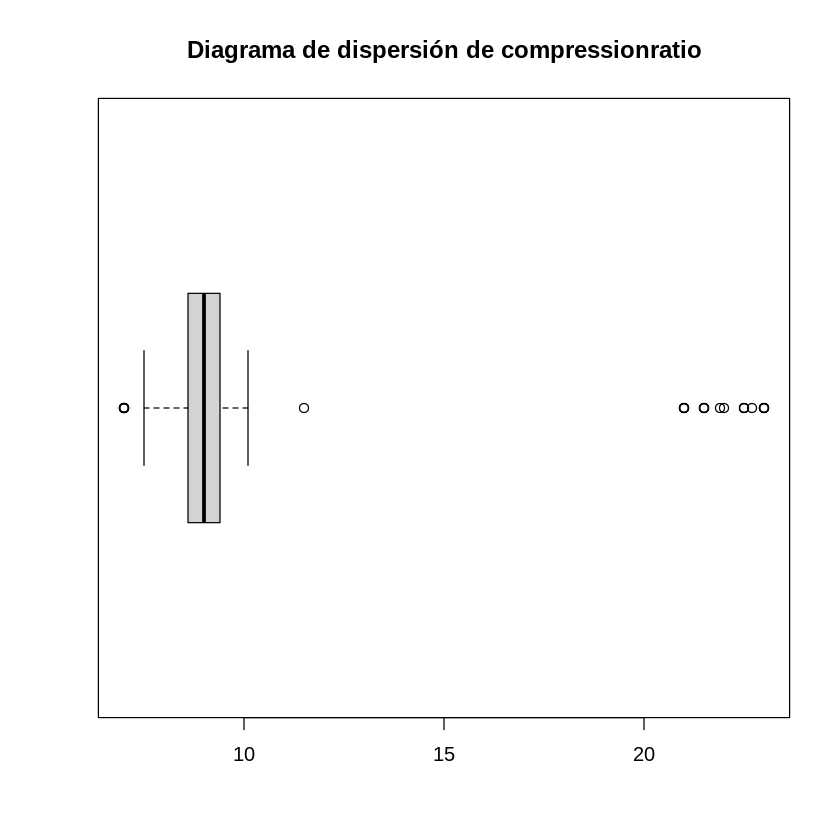

Coeficiente de correlación entre compressionratio y precio: 0.06798351 
Sesgo:  2.572779 


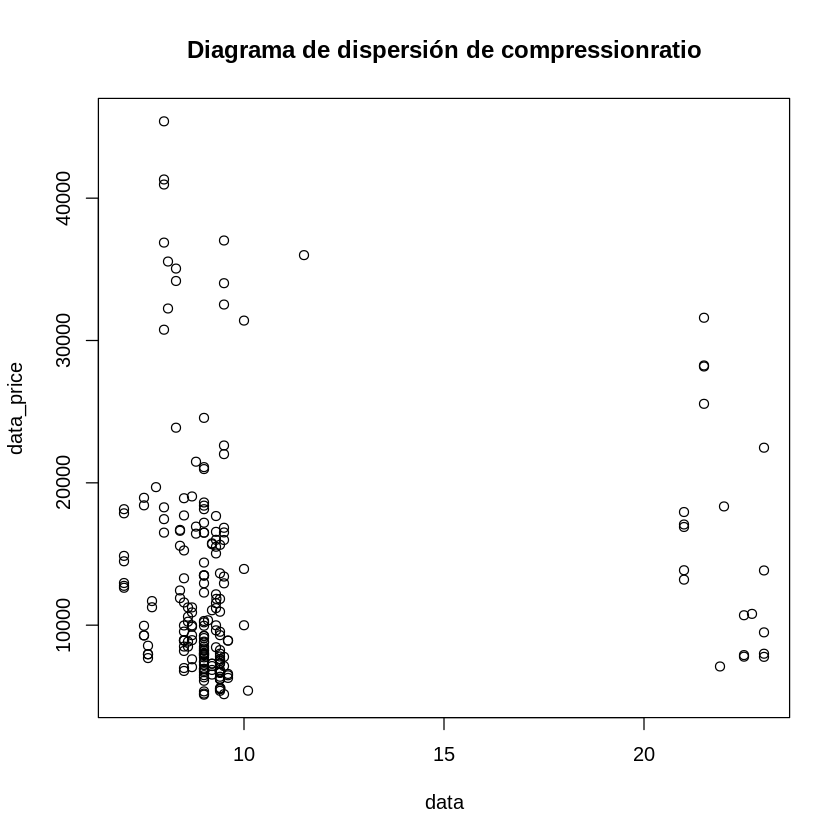

In [93]:
variable = "compressionratio"
data = mydata[[variable]]

# Histograma
hist(data,col=0,main=paste("Histograma de",  variable))

# Diagrama de caja y bigotes
boxplot(data,horizontal=TRUE, main=paste("Diagrama de dispersión de", variable))

# Diagrama de dispersión
plot(data,data_price, main=paste("Diagrama de dispersión de", variable))

# Coeficiente de correlación
coef_corr <- cor(mydata[[variable]], mydata[["price"]], use = "complete.obs")
    cat("Coeficiente de correlación entre", variable, "y precio:", coef_corr, "\n")

# Coeficiente de sesgo
sesgo = skewness(data)
cat("Sesgo: ", sesgo, "\n")

Distribución: **Asimétrica**

La mayoría de los datos se encuentran a la derecha y en un rango entre 0 y 15, mientras que los demás pcoos ya se pueden considerar outliers, y están del otro extremo. No es una distribución normal, habría que probar eliminando outliers si se selecciona.

Correlación con precio: 0.06, no es un buen coeficiente de correlación, por lo que se puede decir que no existe una relación entre ambos probablemente.

###Horsepower

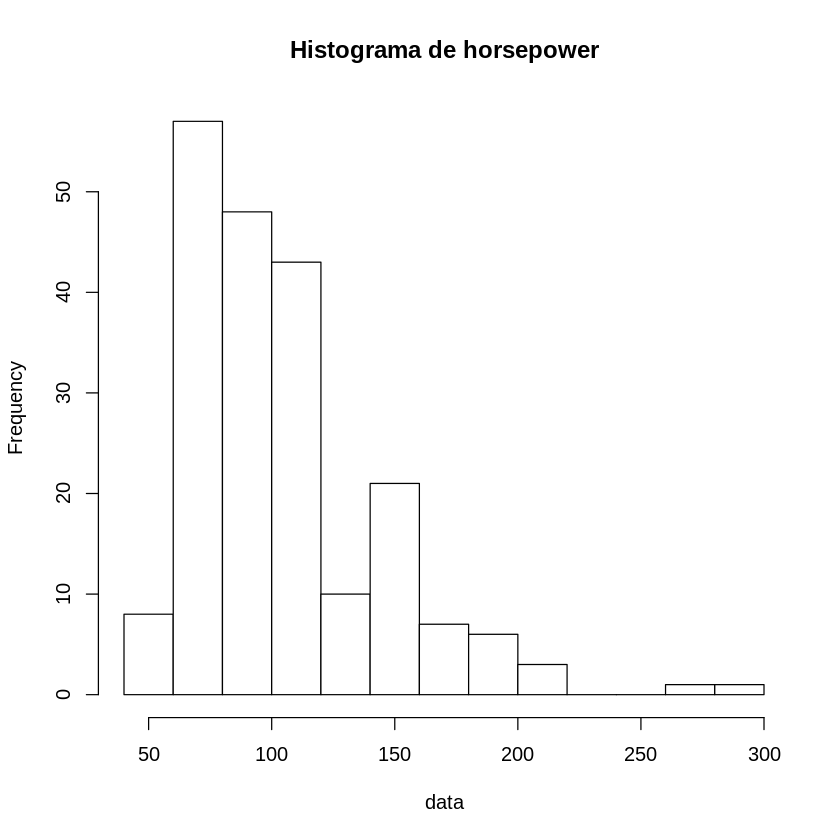

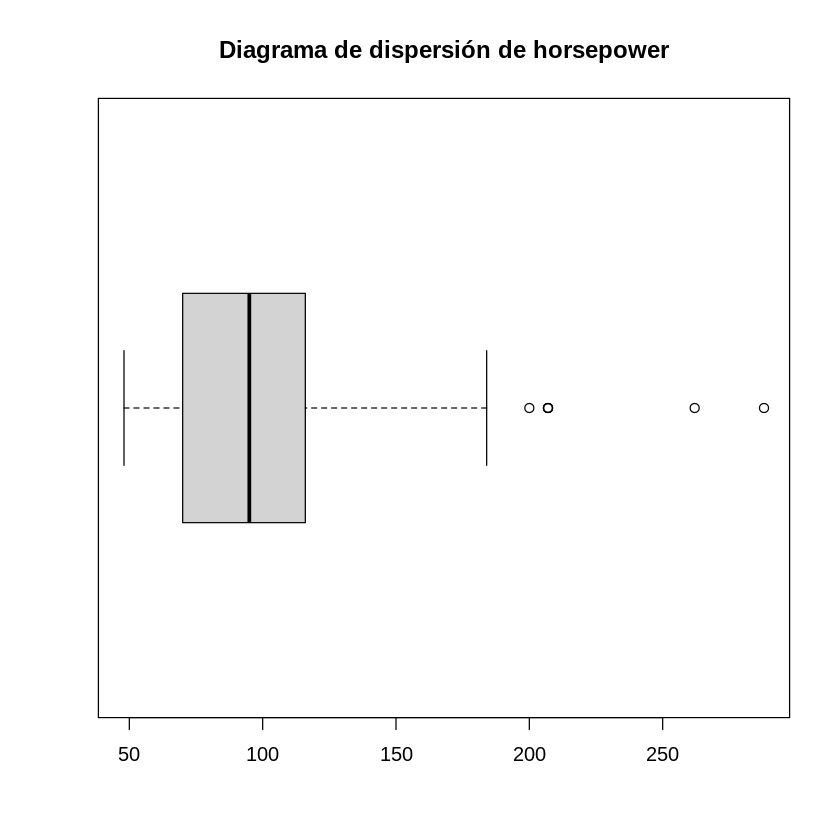

Coeficiente de correlación entre horsepower y precio: 0.8081388 
Sesgo:  1.384812 


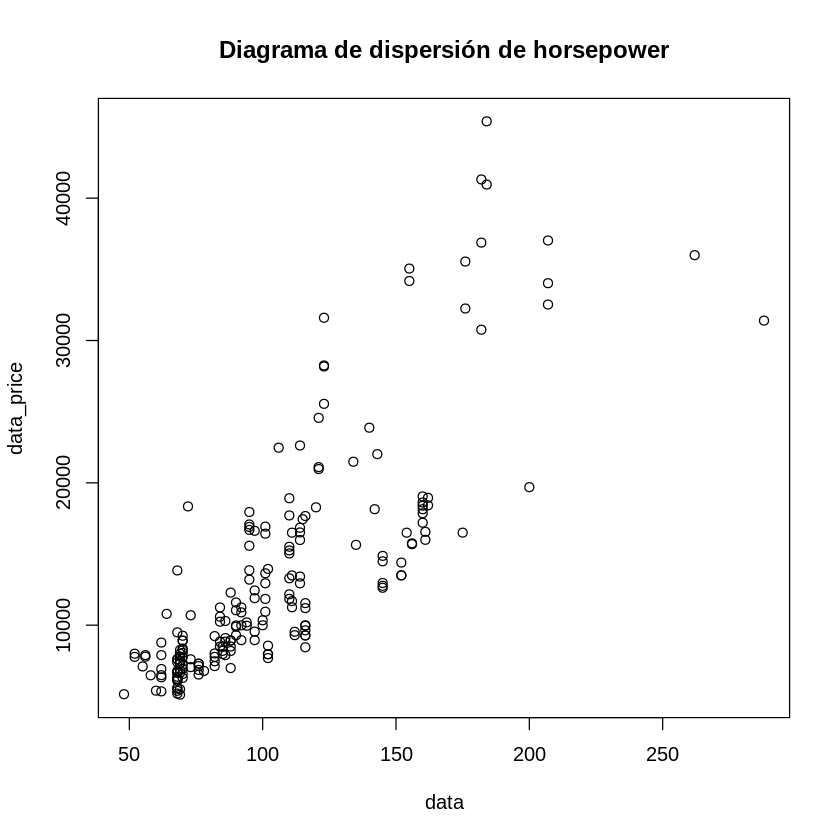

In [94]:
variable = "horsepower"
data = mydata[[variable]]

# Histograma
hist(data,col=0,main=paste("Histograma de",  variable))

# Diagrama de caja y bigotes
boxplot(data,horizontal=TRUE, main=paste("Diagrama de dispersión de", variable))

# Diagrama de dispersión
plot(data,data_price, main=paste("Diagrama de dispersión de", variable))

# Coeficiente de correlación
coef_corr <- cor(mydata[[variable]], mydata[["price"]], use = "complete.obs")
    cat("Coeficiente de correlación entre", variable, "y precio:", coef_corr, "\n")

# Coeficiente de sesgo
sesgo = skewness(data)
cat("Sesgo: ", sesgo, "\n")

Distribución: **Asimétrica**

La gráfica del histograma nos indica que existe asimetría hacia la derecha, pues está más grande esa cola, además de que el sesgo es positivo y es un valor alto.

Correlación con precio: 0.80 (Es un valor alto de correlación entre las variables, aunque se ve que a partir de los 200, ya hay muy pcoos datos, pero los demás se nota que sí tienen una relación directa con el precio.

###Peak rpm

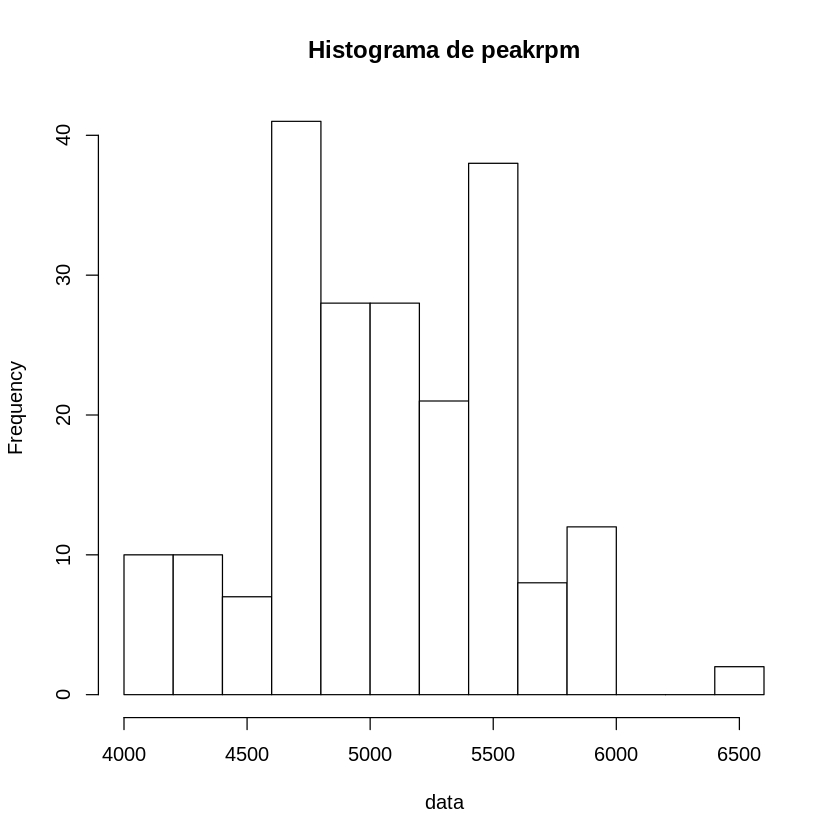

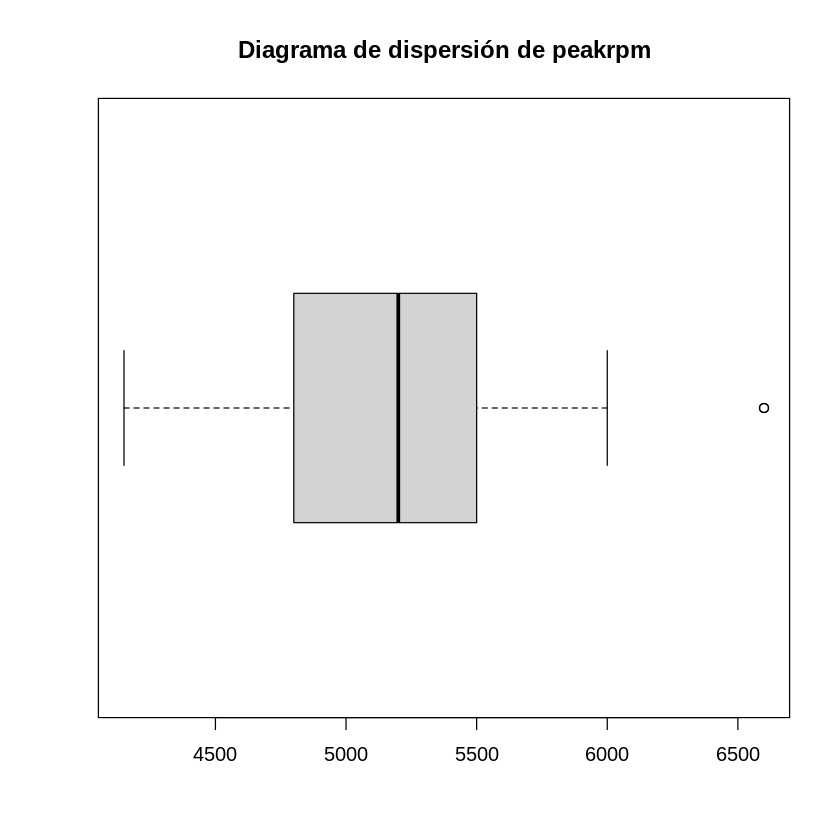

Coeficiente de correlación entre peakrpm y precio: -0.08526715 
Sesgo:  0.07406242 


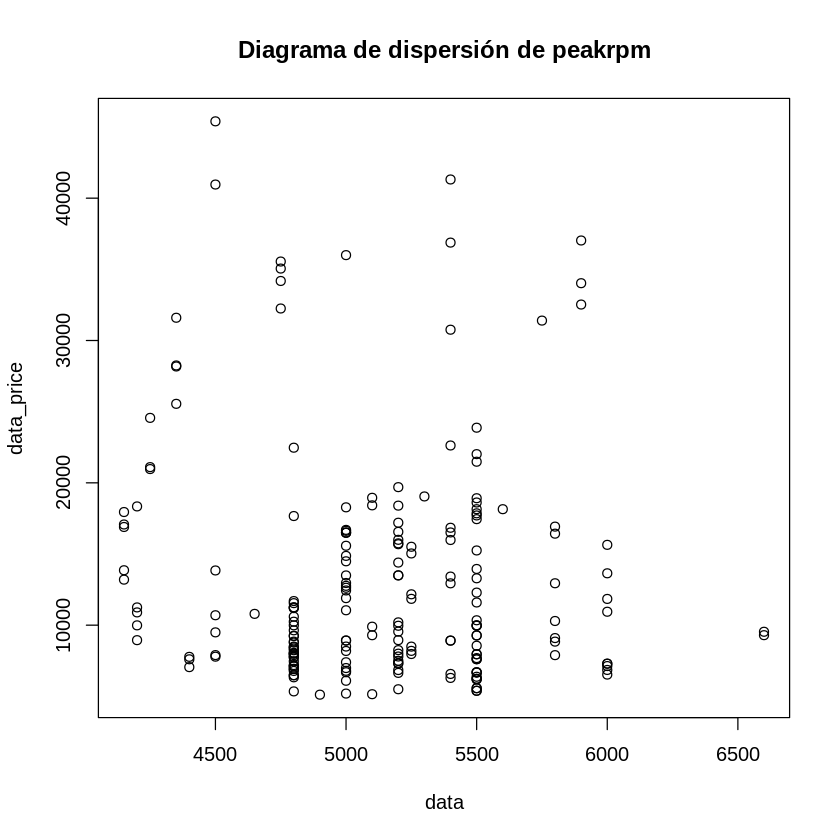

In [95]:
variable = "peakrpm"
data = mydata[[variable]]

# Histograma
hist(data,col=0,main=paste("Histograma de",  variable))

# Diagrama de caja y bigotes
boxplot(data,horizontal=TRUE, main=paste("Diagrama de dispersión de", variable))

# Diagrama de dispersión
plot(data,data_price, main=paste("Diagrama de dispersión de", variable))

# Coeficiente de correlación
coef_corr <- cor(mydata[[variable]], mydata[["price"]], use = "complete.obs")
    cat("Coeficiente de correlación entre", variable, "y precio:", coef_corr, "\n")

# Coeficiente de sesgo
sesgo = skewness(data)
cat("Sesgo: ", sesgo, "\n")

Distribución: **Simétrica**

Se puede observar que sí hay de cierta forma una distribución normal en la gráfica, pues se ve parecida la cantidad de datos en ambos lados, y además, el sesgo dio un valor muy pequeño.

Si bien tiene distribución normal, no tiene una relación significativa, pues el coeficiente de correlación fue de -0.08.

###City mpg

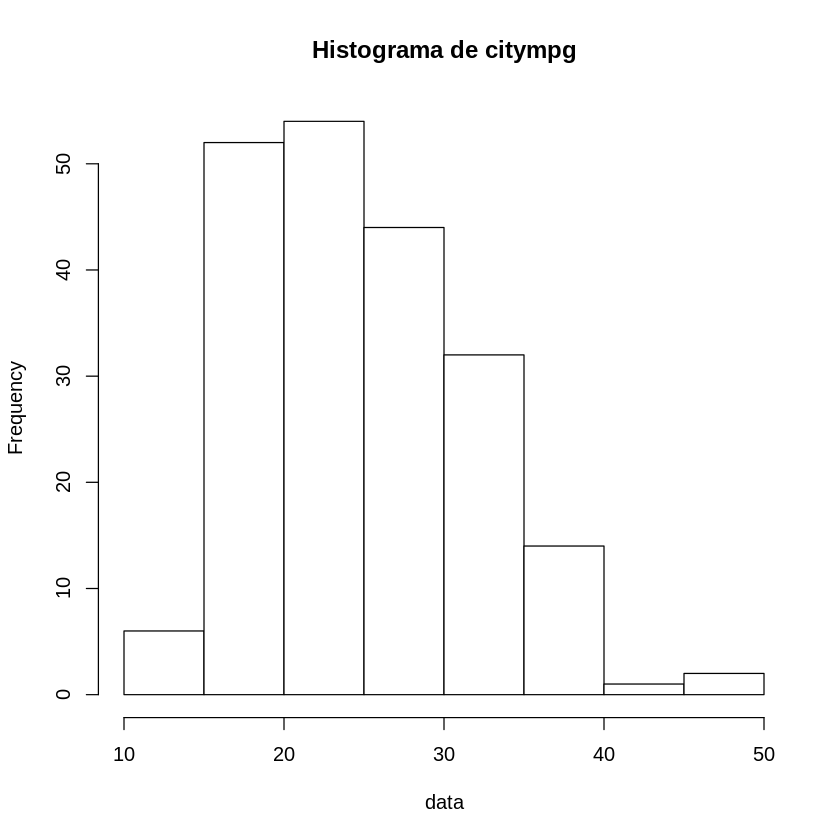

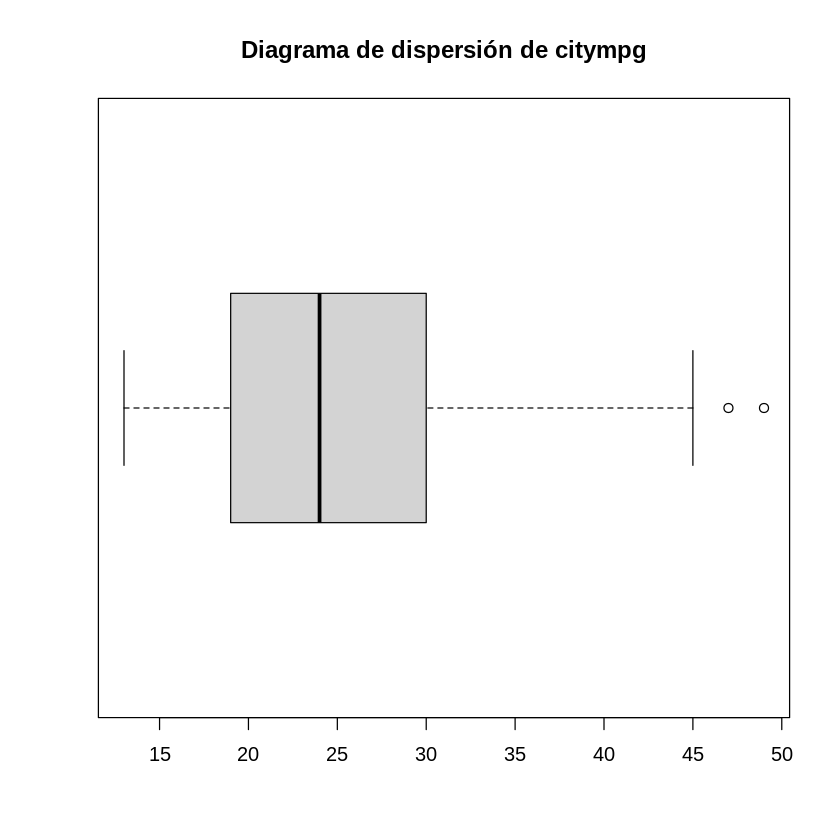

Coeficiente de correlación entre citympg y precio: -0.6857513 
Sesgo:  0.6540229 


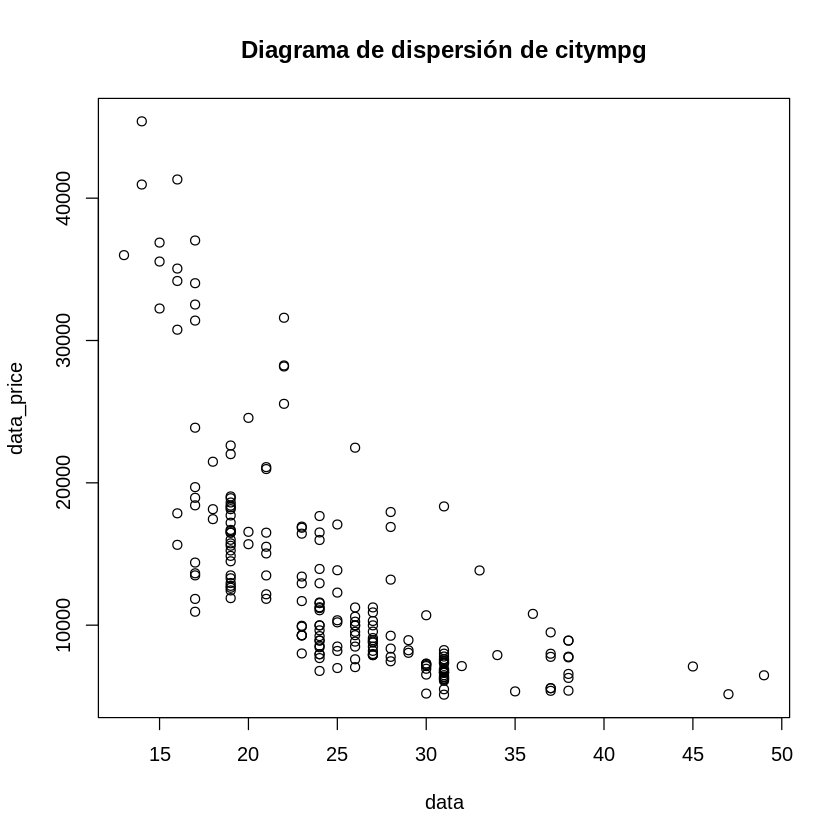

In [96]:
variable = "citympg"
data = mydata[[variable]]

# Histograma
hist(data,col=0,main=paste("Histograma de",  variable))

# Diagrama de caja y bigotes
boxplot(data,horizontal=TRUE, main=paste("Diagrama de dispersión de", variable))

# Diagrama de dispersión
plot(data,data_price, main=paste("Diagrama de dispersión de", variable))

# Coeficiente de correlación
coef_corr <- cor(mydata[[variable]], mydata[["price"]], use = "complete.obs")
    cat("Coeficiente de correlación entre", variable, "y precio:", coef_corr, "\n")

# Coeficiente de sesgo
sesgo = skewness(data)
cat("Sesgo: ", sesgo, "\n")

Distribución: **Asimétrica**

Hay asimetría en el histograma pues hay una mayor cola a la derecha y el sesgo es positivo.

Hay una relación relativamente alta entre las variables, pues el coeficiente de correlación fue de 0.65, podría ser buena opción para analizar.

###Highway mpg

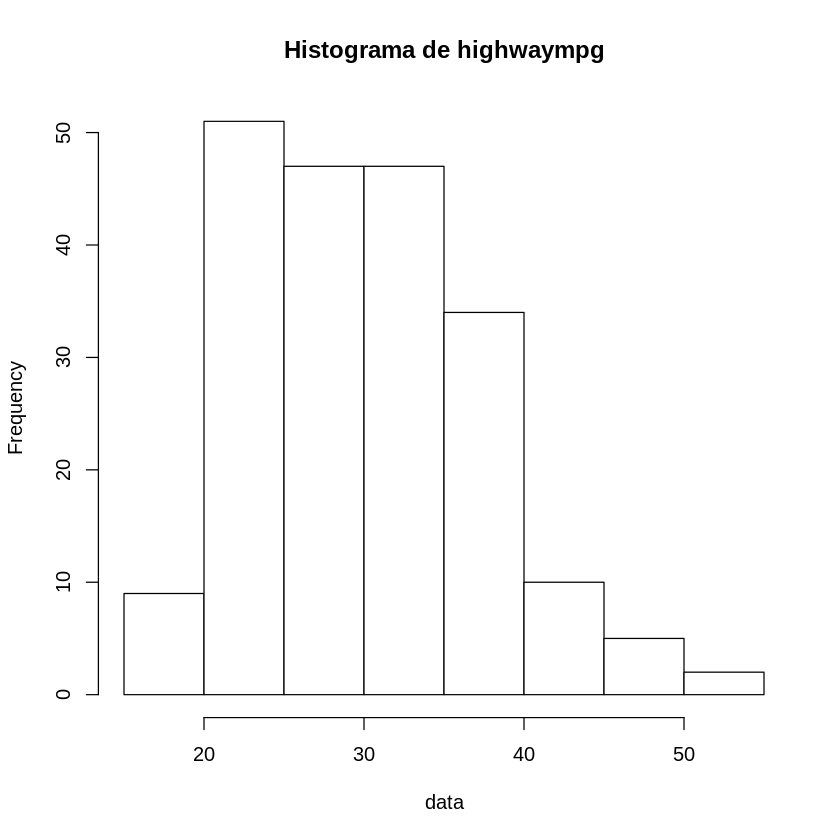

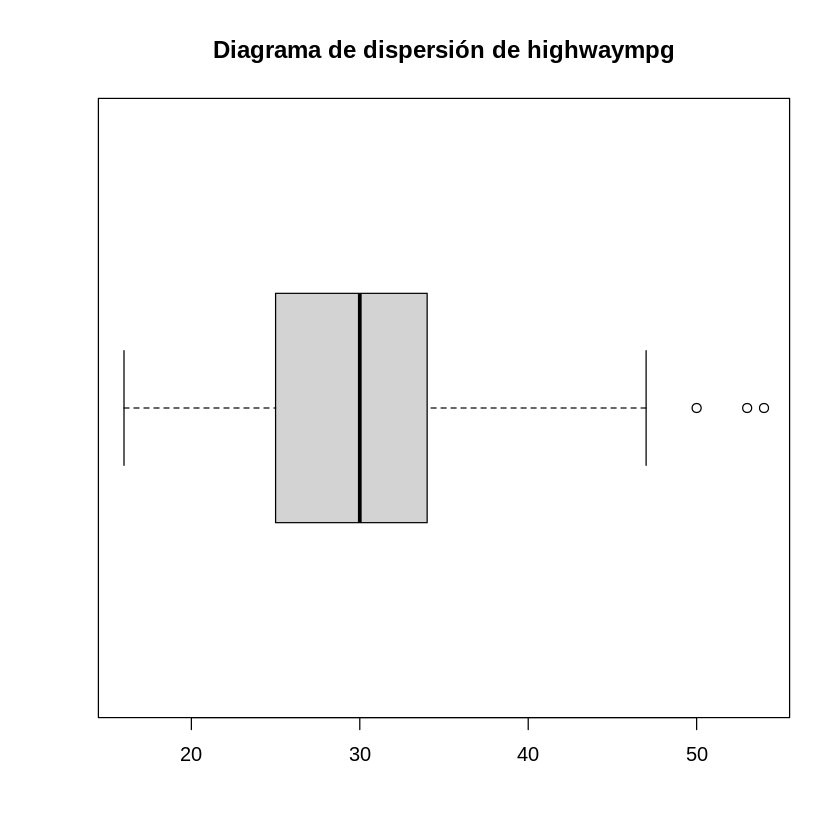

Coeficiente de correlación entre highwaympg y precio: -0.6975991 
Sesgo:  0.5321205 


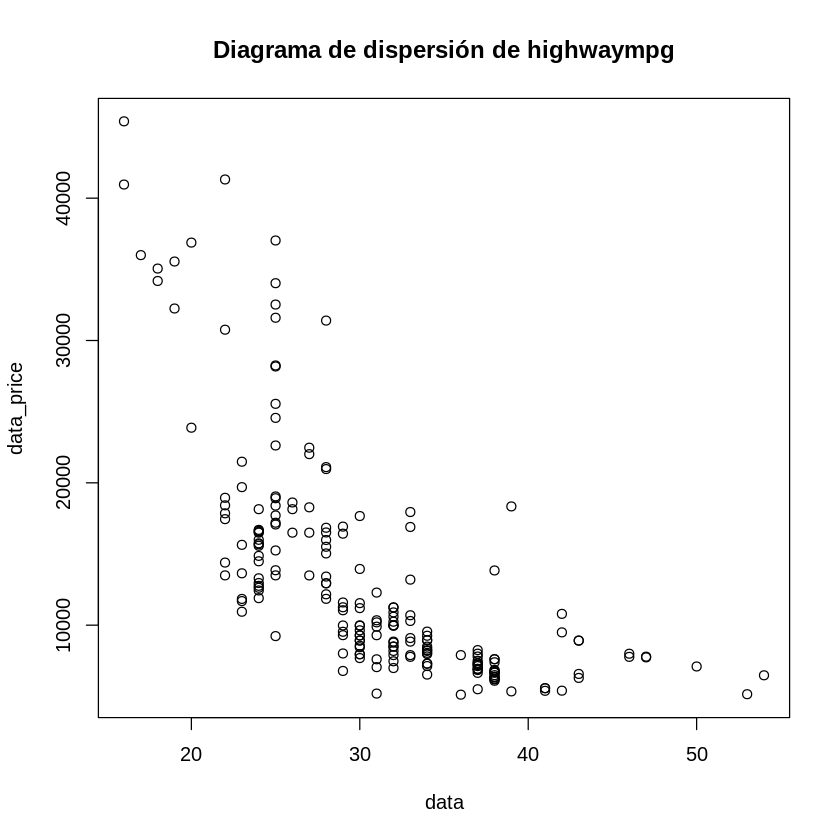

In [97]:
variable = "highwaympg"
data = mydata[[variable]]

# Histograma
hist(data,col=0,main=paste("Histograma de",  variable))

# Diagrama de caja y bigotes
boxplot(data,horizontal=TRUE, main=paste("Diagrama de dispersión de", variable))

# Diagrama de dispersión
plot(data,data_price, main=paste("Diagrama de dispersión de", variable))

# Coeficiente de correlación
coef_corr <- cor(mydata[[variable]], mydata[["price"]], use = "complete.obs")
    cat("Coeficiente de correlación entre", variable, "y precio:", coef_corr, "\n")

# Coeficiente de sesgo
sesgo = skewness(data)
cat("Sesgo: ", sesgo, "\n")

Distribución: **Asimétrica**

Existe asimetría hacia el lado izquierdo, debido a que la cola es ligeramente más larga de ese lado, sin embargo, no es tan grande el valor a comparación de otros.

Existe una relación negativa en la gráfica, mientras mayor es el highwaympg, menor el precio por lo visto, por lo que sería algo interesante de analizar. Es a la izquierda debido también a que el sesgo es negativo.

##Variables cualitativas

###Fuel type

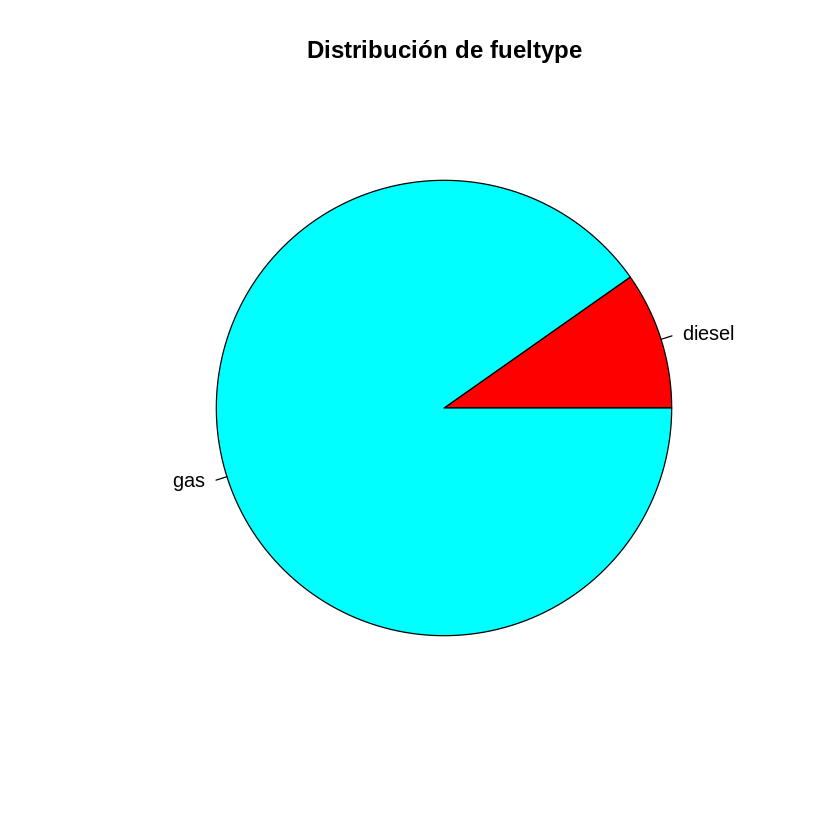

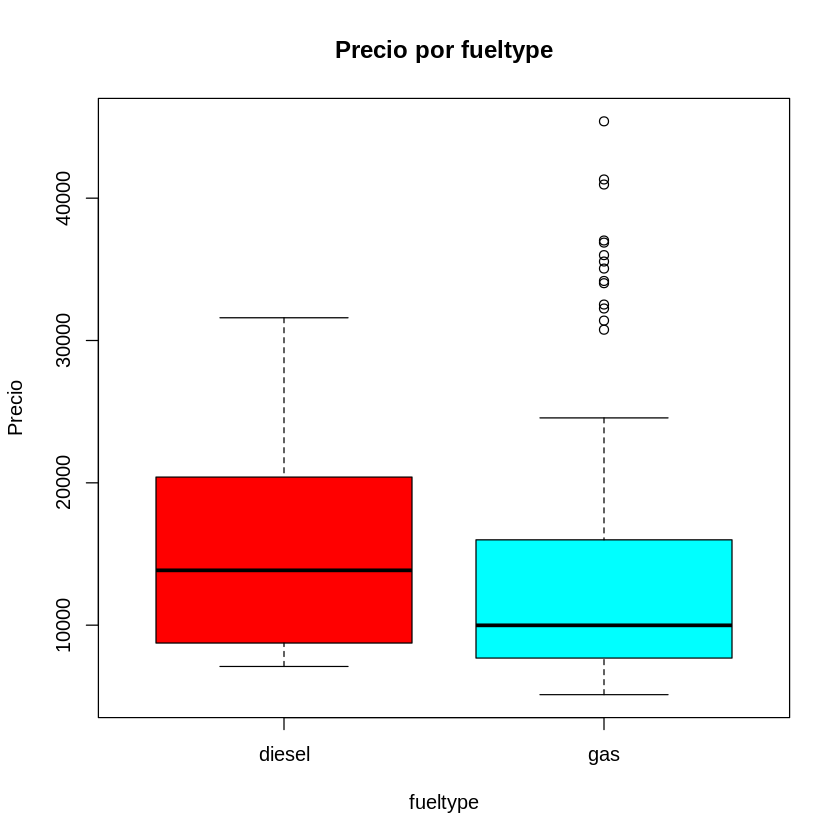

In [98]:
variable = "fueltype"
data = table(mydata[[variable]])

pie(data, main=paste("Distribución de", variable), col=rainbow(length(data)))
boxplot(mydata$price ~ mydata[[variable]], main=paste("Precio por", variable), ylab="Precio", xlab=variable, col=rainbow(length(unique(mydata[[variable]]))))

Las gráficas nos indican que es más probable que si el fueltype es de diesel, es más probable que sea más caro, sin embargo, no existe una gran diferencia entre ambos y no hay mucho punto de diferencia en el límtie inferior.

###Car body

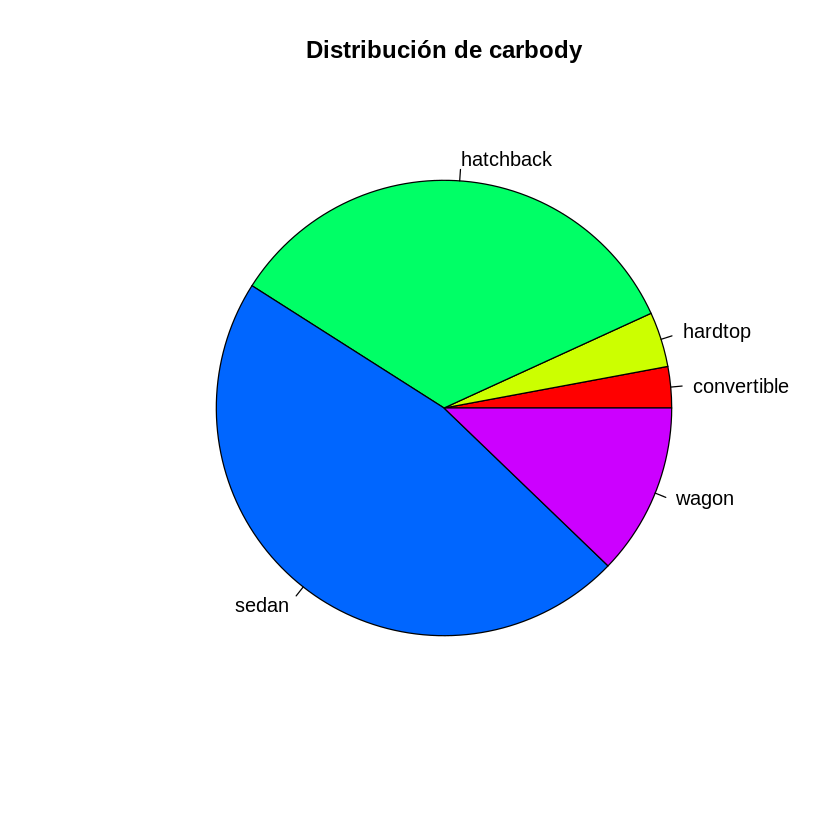

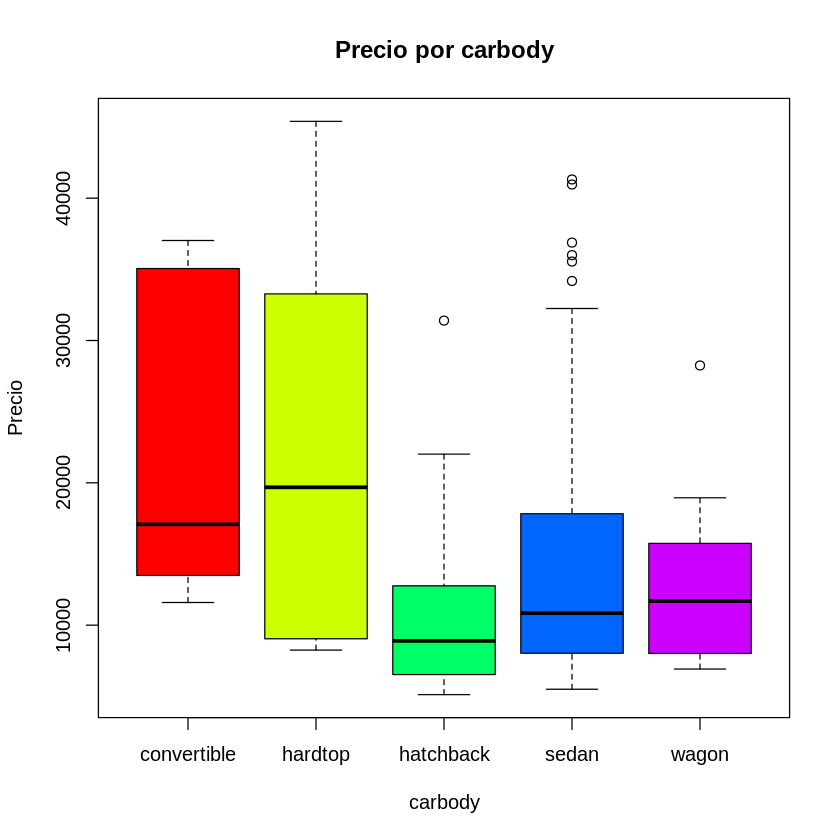

In [99]:
variable = "carbody"
data = table(mydata[[variable]])

pie(data, main=paste("Distribución de", variable), col=rainbow(length(data)))
boxplot(mydata$price ~ mydata[[variable]], main=paste("Precio por", variable), ylab="Precio", xlab=variable, col=rainbow(length(unique(mydata[[variable]]))))

###Drive wheel

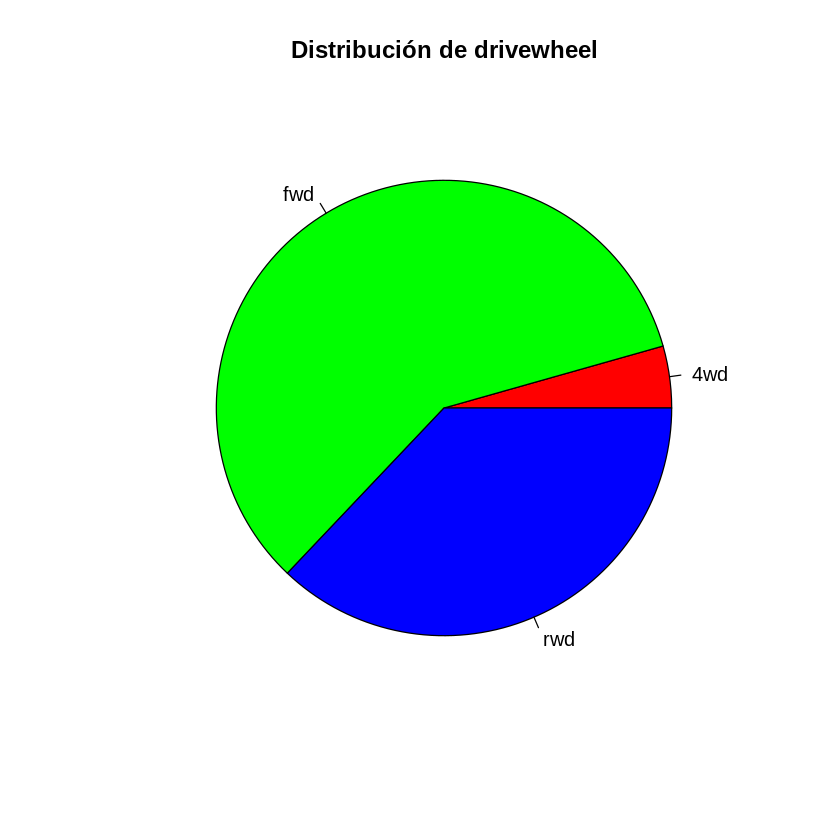

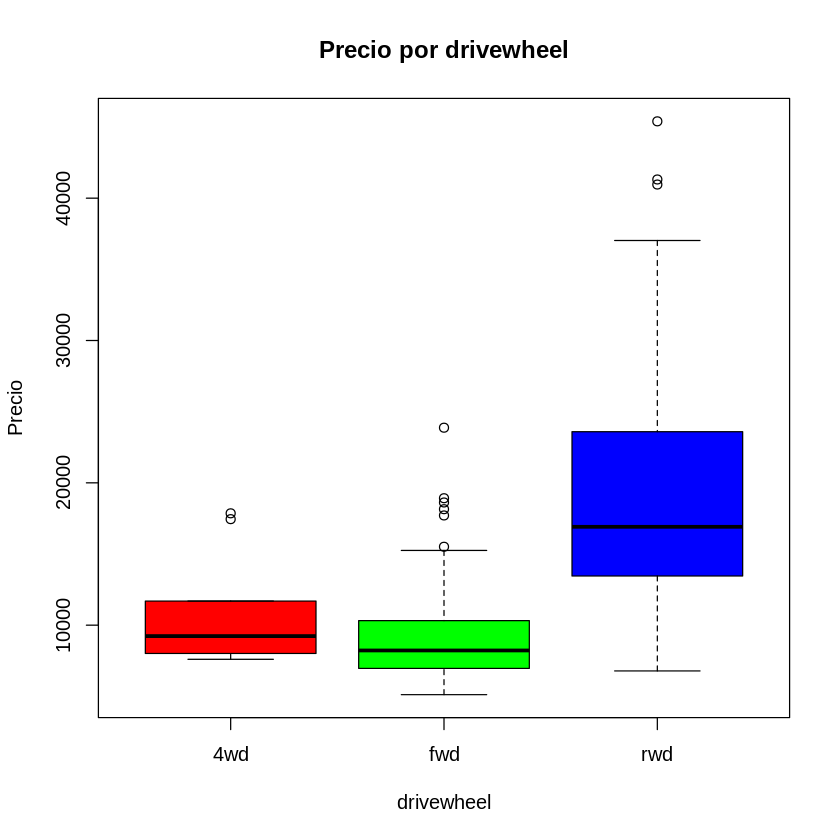

In [100]:
variable = "drivewheel"
data = table(mydata[[variable]])

pie(data, main=paste("Distribución de", variable), col=rainbow(length(data)))
boxplot(mydata$price ~ mydata[[variable]], main=paste("Precio por", variable), ylab="Precio", xlab=variable, col=rainbow(length(unique(mydata[[variable]]))))

Se puede observar que sí existe una diferencia significatva si la drivewheel es rwd, a comparación de una 4wd o fwd, puess entra en un rango mayor.

###Engine location

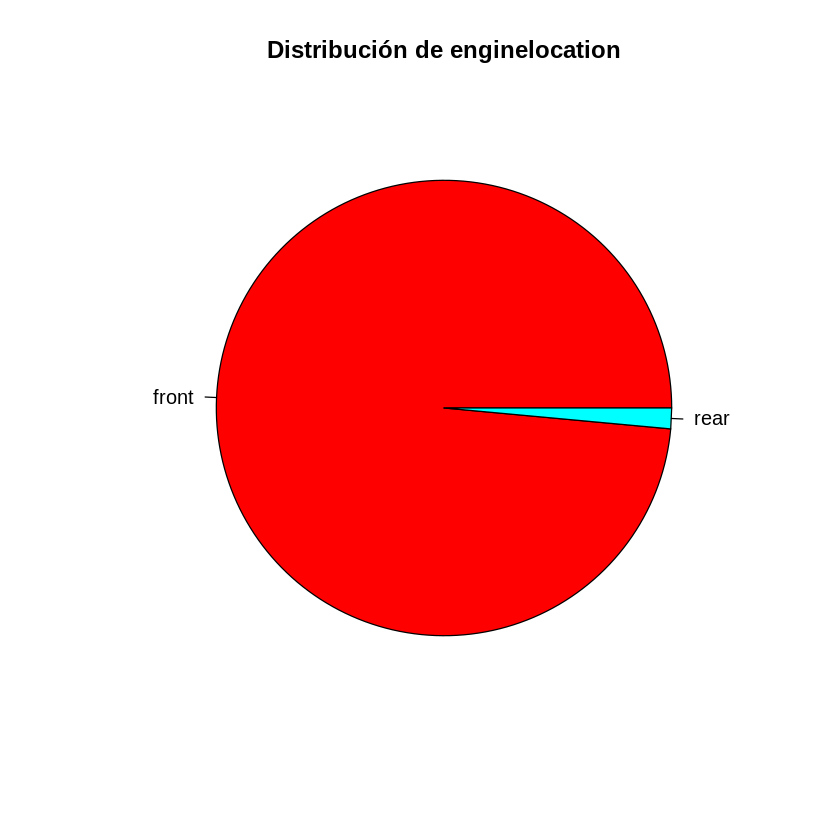

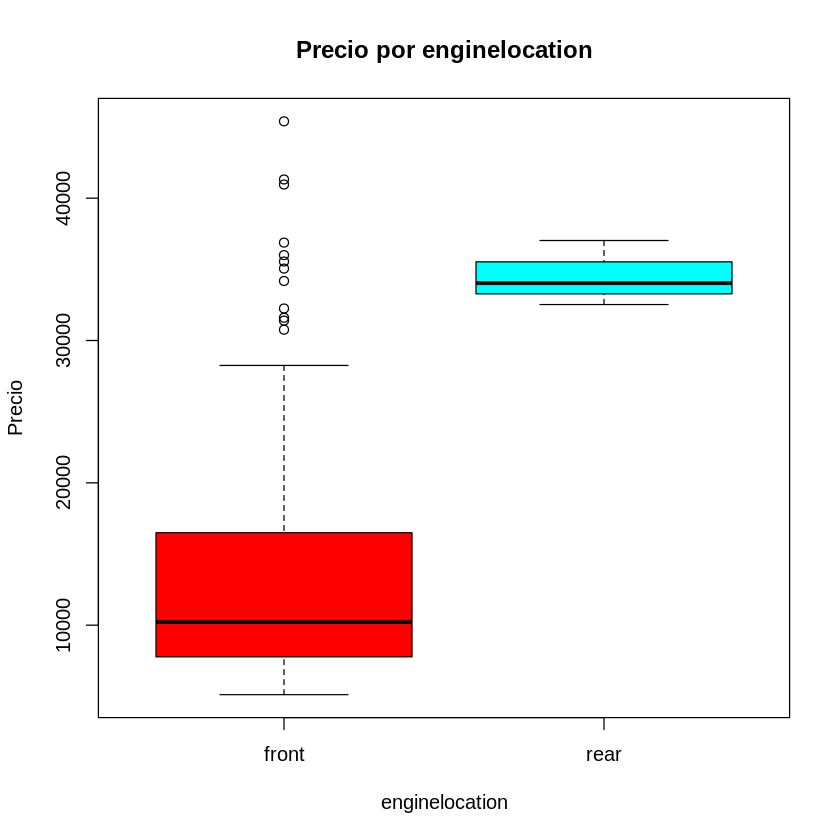

In [101]:
variable = "enginelocation"
data = table(mydata[[variable]])

pie(data, main=paste("Distribución de", variable), col=rainbow(length(data)))
boxplot(mydata$price ~ mydata[[variable]], main=paste("Precio por", variable), ylab="Precio", xlab=variable, col=rainbow(length(unique(mydata[[variable]]))))

Hay pocos datos para analizar esta variable, y son tan pocos que no tenemos sufuciente evidencia para encontrar una relación.

###Engine Type

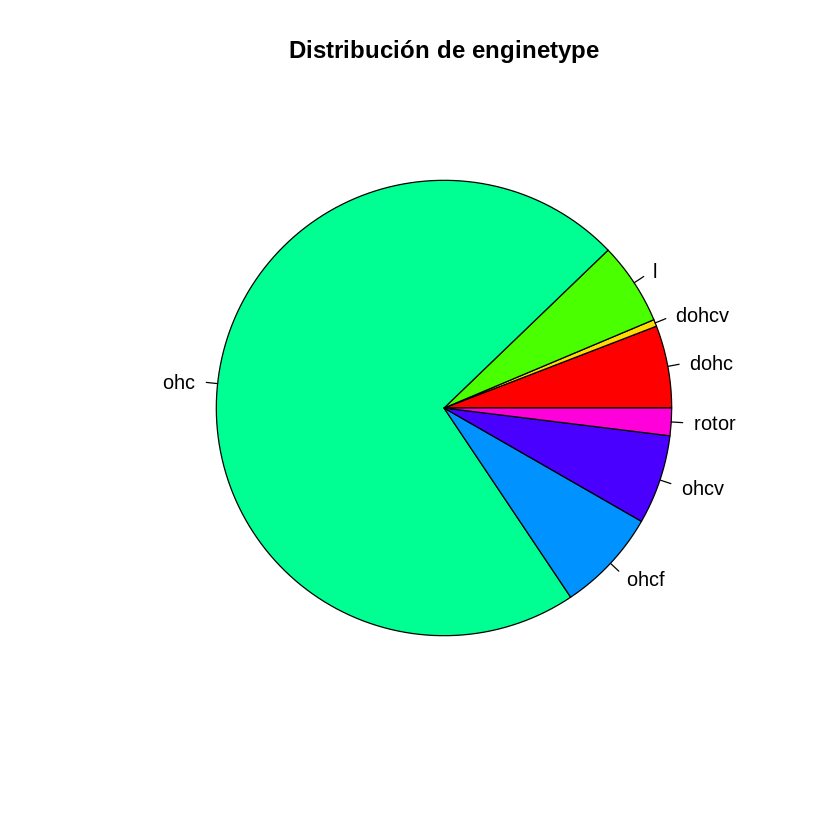

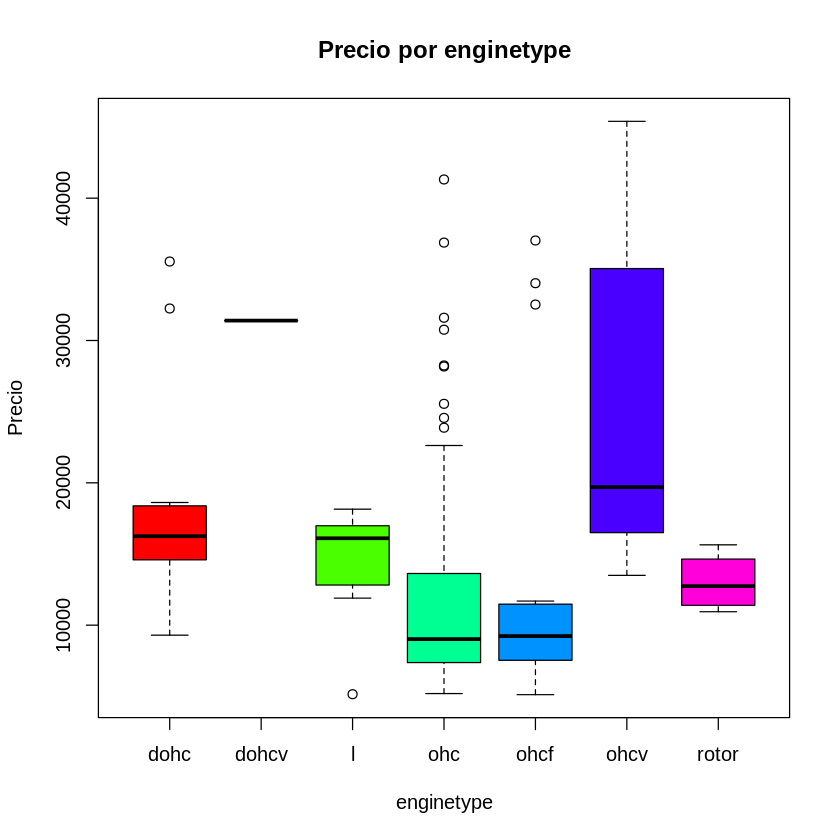

In [102]:
variable = "enginetype"
data = table(mydata[[variable]])

pie(data, main=paste("Distribución de", variable), col=rainbow(length(data)))
boxplot(mydata$price ~ mydata[[variable]], main=paste("Precio por", variable), ylab="Precio", xlab=variable, col=rainbow(length(unique(mydata[[variable]]))))

###Cylinder number

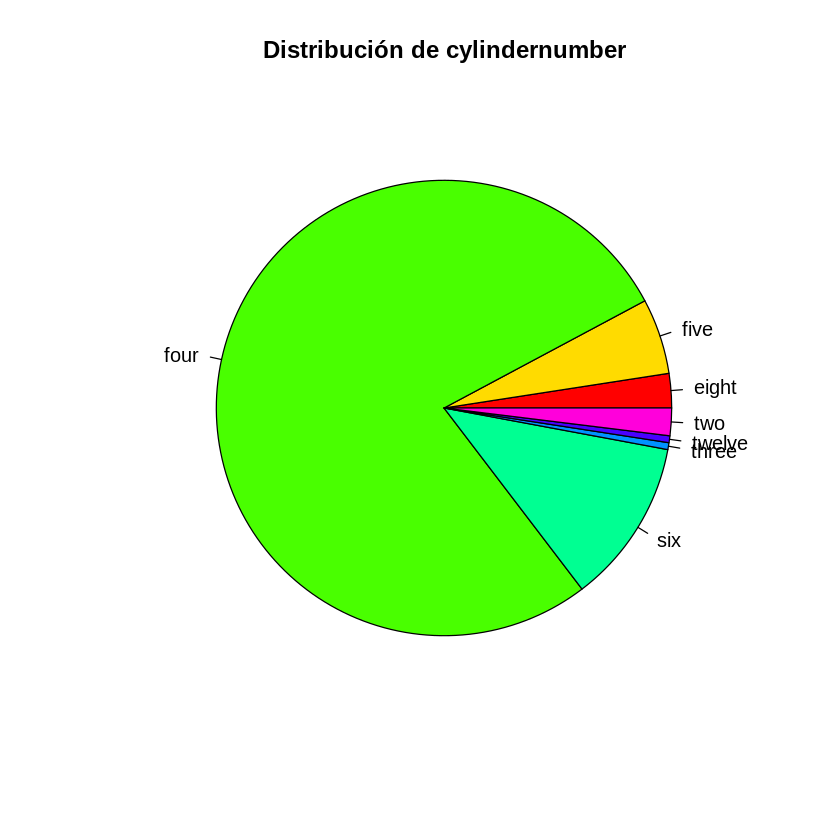

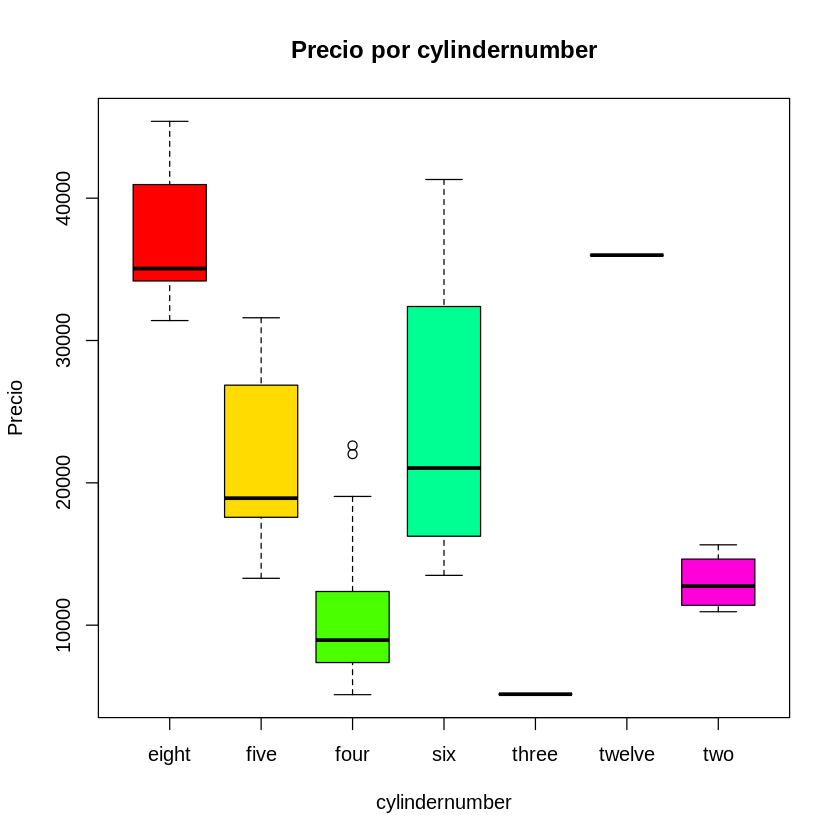

In [103]:
variable = "cylindernumber"
data = table(mydata[[variable]])

pie(data, main=paste("Distribución de", variable), col=rainbow(length(data)))
boxplot(mydata$price ~ mydata[[variable]], main=paste("Precio por", variable), ylab="Precio", xlab=variable, col=rainbow(length(unique(mydata[[variable]]))))

Se puede observar que hay una mayor variabilidad de los datos, y hay más opciones, con una buena y legal cantidad de datos para entrenar cada posible respuesta.

## **Datos seleccionados**

Dados los cálculos y análisis anteriores, he seleccionado las siguientes variables para el modelo:

1. **Engine Size**: Seleccioné esta variable porque es una de las que tiene el mayor coeficiente de correlación con la variable de precio, y nos puede ayudar a predecir buenos valores. Aunque no está distribuida, esto se puede transformar a futuro.

2. **Car width**: Es también una de las variables con el mayor coeficiente de correlación y puede indicarnos buenas predicciones, quizás mientras más ancho esté el carro y más espacio, puede consumir más recursos y ser más probable a costrar más.

3. **Drive wheel**: Se seleccionó drive wheel porque se notó que además de al parecer, sí hay una diferencia grande y notable cuando se selecciona una rueda de rwd, a comparación de las otras 2. Además, deado que solo son 3 posibles resultados, se facilita también en la implementación, además de que es lógico que el tipo de llanta tenga un impacto en el precio, quizás unas son más grandes que otras o requieren más material. 

4. **Curb weigh**t: Esta es una de las variables que quizás consideremos más importantes debido a que el coeficiente de correlación parece ser muy alto, y afortunadamente no cuenta con un sesgo tan alto como otras variables, por lo que puede llegar a ser muy bueno.

5. **Cylinder number**: Es una de las variables más representativas para este modelo, pues afortunadamente con esta variable cuentas con posibles salidas muy lejanas, y esto permite también que se entrene mejor al modelo. La cantidad de cilindros forma un papel fudnamental y se manejará adecuadamente.

6. **City mpg**: Este es un valor muy interesante pero que también puede tener un impacto significativo. Tenía una confianza de -0.68 y además será bueno incluirlo porque parecer trabajar con una función inversa y nos puede llevar a resultados interesantes. No tiene un valor tan grande de sesgo por lo que podríamos trabajar con él fácilmente.

Cambiamos variables categóricas a variables dummy.

*drivewheel*

In [104]:
# Creamos variables dummy para 'drivewheel'
drivewheel_dummies <- model.matrix(~drivewheel - 1, data=mydata)

# Lo convertimos a un dataframe
drivewheel_df <- as.data.frame(drivewheel_dummies)

# Cambiamos nombres de columnas para que tengan el prefijo 'drivewheel'
colnames(drivewheel_df) <- gsub("drivewheel", "drivewheel_", colnames(drivewheel_df))

# Unir al dataframe original
mydata <- cbind(mydata, drivewheel_df)

# Eliminar la columna 'drivewheel' original
mydata$drivewheel <- NULL

cylinderNumber

In [105]:
# Creamos variables dummy para 'cylindernumber'
cylinder_dummies <- model.matrix(~cylindernumber - 1, data=mydata)

# Lo convertimos a un dataframe
cylinder_df <- as.data.frame(cylinder_dummies)

# Cambiamos nombres de columnas para que tengan el prefijo 'cylindernumber'
colnames(cylinder_df) <- gsub("cylinder", "cylinder_", colnames(drivewheel_df))

# Unir al dataframe original
mydata <- cbind(mydata, cylinder_df)


En este caso, se deberán también transformar todas las variables cuantitativas que identificamos que no tenían distribución normal, esto se podrá realizar por medio de alguno de los métodos Yeo-Johnson o Boxcox igualmente.

Las variables a normalizar serán todas las seleccionadas, pues ninguna conaba con simetría inicial, se buscará que tengan una distribución balanceada en todo el set.

De igual forma, será necesario escalar los datos, pues los datos seleccionados se encuentran en rangos distintos y esto podría afectar el modelo que realicemos.

Esto se implementará en la versión final del entregable y en la entrega para retro de portafolio de implementación.